In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2

In [2]:
df1 = pd.read_csv('feature_output.csv')
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
2,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...,https://api.spotify.com/v1/audio-analysis/4pdP...,205947,4
3,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
4,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4


In [3]:
df2 = pd.read_csv('ranking_output.csv')
df2.head()

,Position,Track Name,Artist,Streams,URL,Country,Date
0,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,global,2017-01-01
1,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,global,2017-01-01
2,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,global,2017-01-01
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,global,2017-01-01
4,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,global,2017-01-01


In [4]:
cc = pd.read_csv('country-codes.csv')
cc.head()

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3,AL,AB,AL,...,Southern Europe,Албания,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4,AG,AL,DZ,...,Northern Africa,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5,AQ,,AS,...,Polynesia,Американское Самоа,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [5]:
df2.Country.unique()

array(['global', 'us', 'gb', 'ar', 'at', 'au', 'be', 'bg', 'bo', 'br',
       'ca', 'ch', 'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee',
       'es', 'fi', 'fr', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'il',
       'in', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mt', 'mx', 'my', 'ni',
       'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'ro', 'se',
       'sg', 'sk', 'sv', 'th', 'tr', 'tw', 'uy', 'vn', 'za'], dtype=object)

In [6]:
cc['cc'] = cc['ISO3166-1-Alpha-2'].str.lower()

cc['country'] = cc['UNTERM English Short'].apply(lambda text: str(text).split(' (')[0])
cc['country'].replace('United States of America', 'United States', inplace=True)
cc['country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

cc.loc[cc['ISO3166-1-Alpha-2'] == 'TW', 'country'] = 'Taiwan'
cc.loc[cc['ISO3166-1-Alpha-2'] == 'HK', 'country'] = 'Hong Kong'

In [7]:
df3 = df2.merge(cc[['cc', 'Continent', 'Region Name', 'Sub-region Name', 'country']], how='left', left_on='Country', right_on='cc')

In [8]:
df3['country'].unique()

array([nan, 'United States', 'United Kingdom', 'Argentina', 'Austria',
       'Australia', 'Belgium', 'Bulgaria', 'Bolivia', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Guatemala', 'Hong Kong',
       'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'India',
       'Iceland', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia',
       'Malta', 'Mexico', 'Malaysia', 'Nicaragua', 'Netherlands',
       'Norway', 'New Zealand', 'Panama', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Paraguay', 'Romania', 'Sweden', 'Singapore',
       'Slovakia', 'El Salvador', 'Thailand', 'Turkey', 'Taiwan',
       'Uruguay', 'Viet Nam', 'South Africa'], dtype=object)

In [9]:
df3[df3['cc'].isnull()]['Country'].unique()

array(['global'], dtype=object)

In [10]:
df3['country'] = df3['country'].fillna('World')

In [11]:
df3['track_id'] = df3['URL'].apply(lambda text: re.search(r"([^\/]+$)", str(text)).group())

In [12]:
df3.head()

,Position,Track Name,Artist,Streams,URL,Country,Date,cc,Continent,Region Name,Sub-region Name,country,track_id
0,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,global,2017-01-01,NaN,NaN,NaN,NaN,World,5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,global,2017-01-01,NaN,NaN,NaN,NaN,World,7BKLCZ1jbUBVqRi2FVlTVw
2,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,global,2017-01-01,NaN,NaN,NaN,NaN,World,4pdPtRcBmOSQDlJ3Fk945m
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,global,2017-01-01,NaN,NaN,NaN,NaN,World,5knuzwU65gJK7IF5yJsuaW
4,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,global,2017-01-01,NaN,NaN,NaN,NaN,World,1xznGGDReH1oQq0xzbwXa3


In [13]:
len(df3)

11805021

In [14]:
df = df3.merge(df1, how='inner', left_on='track_id', right_on='id')

In [15]:
len(df)

11804953

In [16]:
df['date'] = pd.to_datetime(df['Date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

In [17]:
full_df = df
df = df[df['date'].dt.year.isin([2017, 2018, 2019])]

In [18]:
df[df.groupby(['date', 'country'])['Position'].transform('count') < 50]['country'].unique()

array(['Bulgaria', 'Estonia', 'Greece', 'Iceland', 'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Nicaragua', 'Slovakia'],
      dtype=object)

In [19]:
df[df['country'] == 'nan']

,Position,Track Name,Artist,Streams,URL,Country,Date,cc,Continent,Region Name,...,id,uri,track_href,analysis_url,duration_ms,time_signature,date,month,day,dayofweek


In [20]:
countries_to_drop = df[df.groupby(['date', 'country'])['Position'].transform('count') < 50]['country'].unique().tolist()

In [21]:
df[df['country'] == 'World'].groupby('month')['valence'].mean()

month
1     0.488763
2     0.478776
3     0.483192
4     0.486186
5     0.497764
6     0.499311
7     0.501656
8     0.504247
9     0.502332
10    0.494994
11    0.495437
12    0.516192
Name: valence, dtype: float64

In [22]:
regions = [(df[df['Sub-region Name'] == region].groupby(['Sub-region Name'])['valence'].mean().tolist(), region) for region in df['Sub-region Name'].unique()]
regions.sort(key=lambda x: x[0], reverse=True)
regions = regions[:-1]
regions

[([0.6064241976311571], 'Latin America and the Caribbean'),
 ([0.5129057084974536], 'Southern Europe'),
 ([0.5041178291861624], 'Western Europe'),
 ([0.4961177768729954], 'Southern Asia'),
 ([0.48807674667891693], 'Northern Europe'),
 ([0.4827782497361297], 'Western Asia'),
 ([0.47982048081584644], 'Eastern Europe'),
 ([0.47661051987096714], 'Eastern Asia'),
 ([0.47564482980179756], 'Australia and New Zealand'),
 ([0.45534996352716817], 'Northern America'),
 ([0.45286574209141234], 'Sub-Saharan Africa'),
 ([0.44816448629306455], 'South-eastern Asia')]

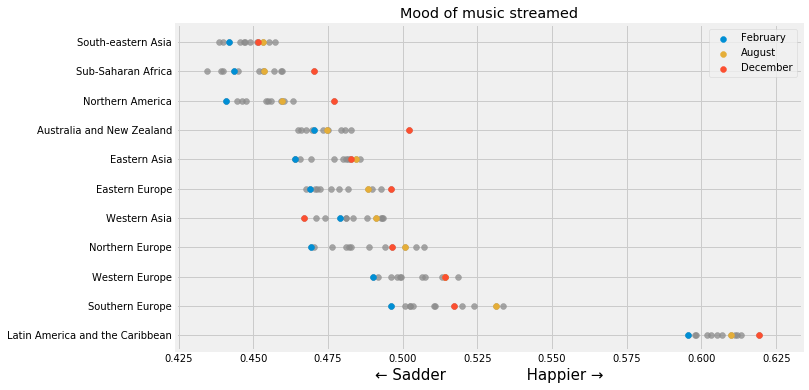

In [23]:
plt.figure(figsize=(10, 6))
for region in regions:
    region = region[1]
    data = df[df['Sub-region Name'] == region].groupby(['month', 'Sub-region Name'])['valence'].mean().tolist()
    if region == 'Northern America':
#         plt.axhline(region, linestyle='--', linewidth=2, c='k')
        plt.scatter(data, [region] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
        plt.scatter(data[1], region, c='#008fd5', s=35, label='February', zorder=5)
        plt.scatter(data[7], region, c='#e5ae38', s=35, label='August', zorder=5)
        plt.scatter(data[11], region, c='#fc4f30', s=35, label='December', zorder=5)
    else:
        if len(data) == 12:
            plt.scatter(data, [region] * len(data), c='#8b8b8b', s=35, alpha=.75)
            plt.scatter(data[1], region, c='#008fd5', s=35)
            plt.scatter(data[7], region, c='#e5ae38', s=35)
            plt.scatter(data[11], region, c='#fc4f30', s=35)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.show()

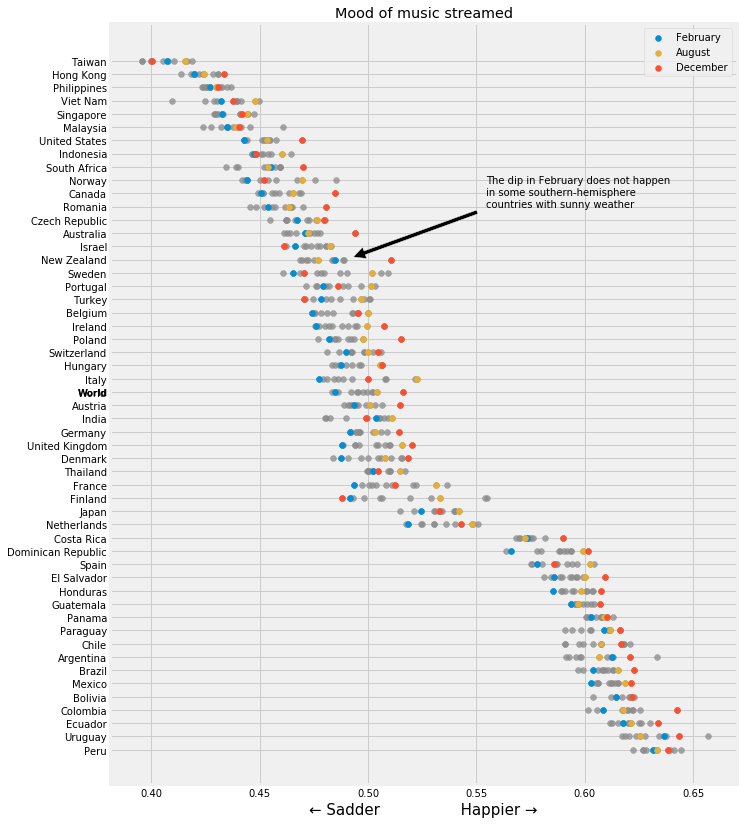

In [24]:
countries = [(full_df[full_df['country'] == country].groupby(['country'])['valence'].mean().tolist(), country) for country in df['country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 14))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = full_df[full_df['country'] == country].groupby(['month', 'country'])['valence'].mean().tolist()
        if country == 'World':
#             plt.axhline(country, linestyle='--', linewidth=2, c='k')
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
            plt.scatter(data[1], country, c='#008fd5', s=35, label='February', zorder=5)
            plt.scatter(data[7], country, c='#e5ae38', s=35, label='August', zorder=5)
            plt.scatter(data[11], country, c='#fc4f30', s=35, label='December', zorder=5)
        else:
            if len(data) == 12:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75)
                plt.scatter(data[1], country, c='#008fd5', s=35)
                plt.scatter(data[7], country, c='#e5ae38', s=35)
                plt.scatter(data[11], country, c='#fc4f30', s=35)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.text(.3801, 26.935, 'World', fontweight='bold', fontsize=9, horizontalalignment='right', verticalalignment='center')
plt.annotate("The dip in February does not happen\nin some southern-hemisphere\ncountries with sunny weather",
             xy=(.49, 'New Zealand'),  xycoords='data',
             xytext=(.6, .8), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.show()

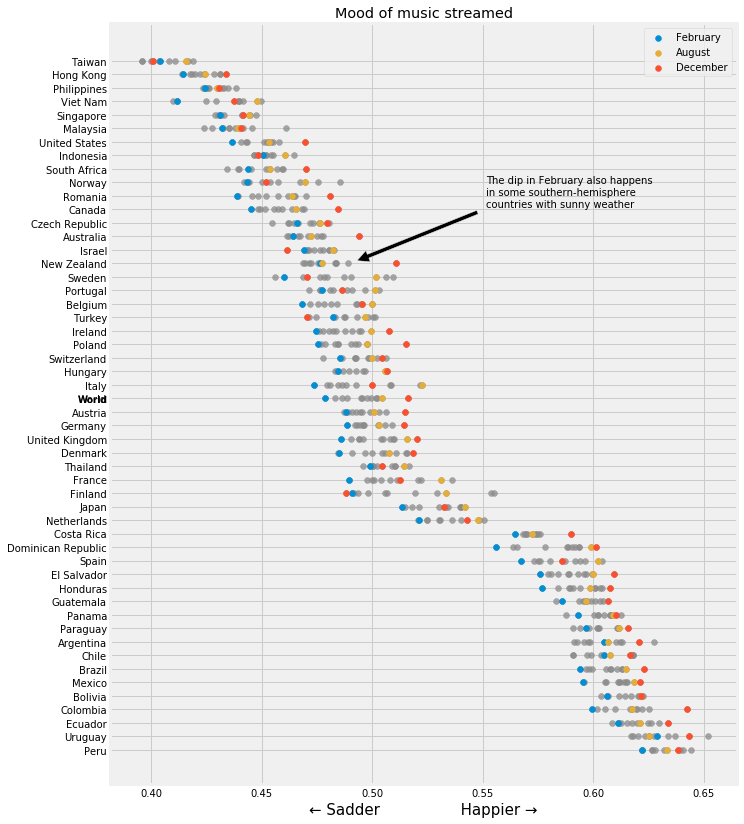

In [25]:
countries = [(df[df['country'] == country].groupby(['country'])['valence'].mean().tolist(), country) for country in df['country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 14))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = df[df['country'] == country].groupby(['month', 'country'])['valence'].mean().tolist()
        if country == 'World':
#             plt.axhline(country, linestyle='--', linewidth=2, c='k')
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
            plt.scatter(data[1], country, c='#008fd5', s=35, label='February', zorder=5)
            plt.scatter(data[7], country, c='#e5ae38', s=35, label='August', zorder=5)
            plt.scatter(data[11], country, c='#fc4f30', s=35, label='December', zorder=5)
        else:
            if len(data) == 12:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75)
                plt.scatter(data[1], country, c='#008fd5', s=35)
                plt.scatter(data[7], country, c='#e5ae38', s=35)
                plt.scatter(data[11], country, c='#fc4f30', s=35)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.text(.3801, 25.935, 'World', fontweight='bold', fontsize=9, horizontalalignment='right', verticalalignment='center')
plt.annotate("The dip in February also happens\nin some southern-hemisphere\ncountries with sunny weather",
             xy=(.49, 'New Zealand'),  xycoords='data',
             xytext=(.6, .8), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.show()

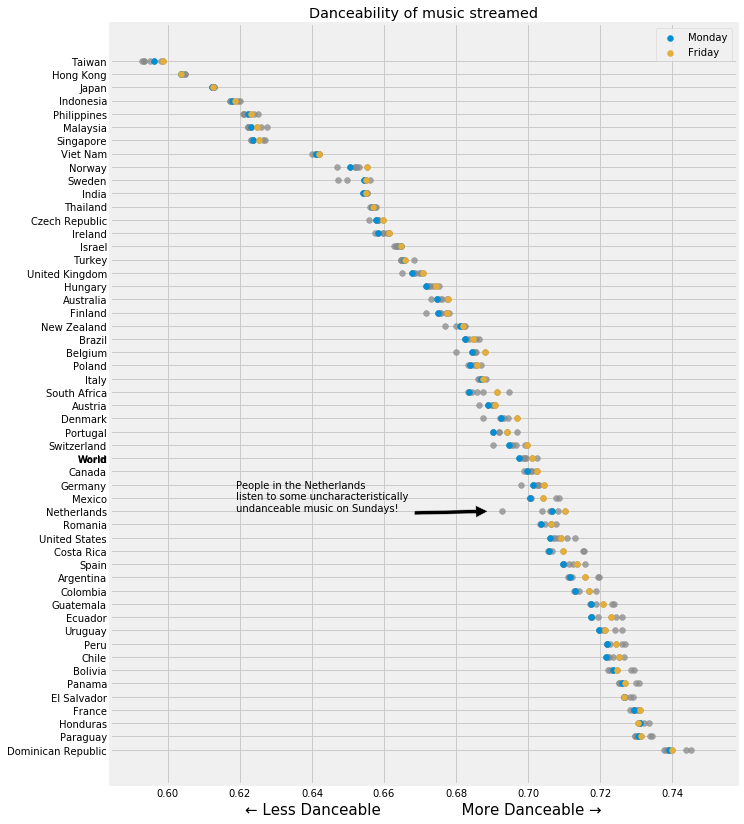

In [26]:
countries = [(df[df['country'] == country].groupby(['country'])['danceability'].mean().tolist(), country) for country in df['country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 14))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = df[df['country'] == country].groupby(['dayofweek', 'country'])['danceability'].mean().tolist()
        if country == 'World':
#             plt.axhline(country, linestyle='--', linewidth=2, c='k')
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
            plt.scatter(data[0], country, c='#008fd5', s=35, label='Monday', zorder=5)
            plt.scatter(data[4], country, c='#e5ae38', s=35, label='Friday', zorder=5)
        else:
            if len(data) == 7:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=35, alpha=.75)
                plt.scatter(data[0], country, c='#008fd5', s=35)
                plt.scatter(data[4], country, c='#e5ae38', s=35)
plt.title('Danceability of music streamed')
plt.xlabel(u'\u2190 Less Danceable                 More Danceable \u2192', fontsize=15)
plt.legend()
plt.text(.5833, 21.934, 'World', fontweight='bold', fontsize=8.9, horizontalalignment='right', verticalalignment='center')
plt.annotate("People in the Netherlands\nlisten to some uncharacteristically\nundanceable music on Sundays!",
             xy=(.69, 'Netherlands'),  xycoords='data',
             xytext=(.2, .4), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.show()

In [27]:
df_year = df[df['country'] == 'World'].groupby(['month', 'day'], as_index=False)['valence'].mean()
df_year

,month,day,valence
0,1,1,0.526481
1,1,2,0.484778
2,1,3,0.483428
3,1,4,0.487655
4,1,5,0.488888
...,...,...,...
360,12,27,0.489886
361,12,28,0.493529
362,12,29,0.494730
363,12,30,0.493947


In [28]:
df_year.groupby('month')['valence'].mean()

month
1     0.488763
2     0.478772
3     0.483192
4     0.486185
5     0.497736
6     0.499244
7     0.501798
8     0.504102
9     0.502332
10    0.494994
11    0.495437
12    0.516192
Name: valence, dtype: float64

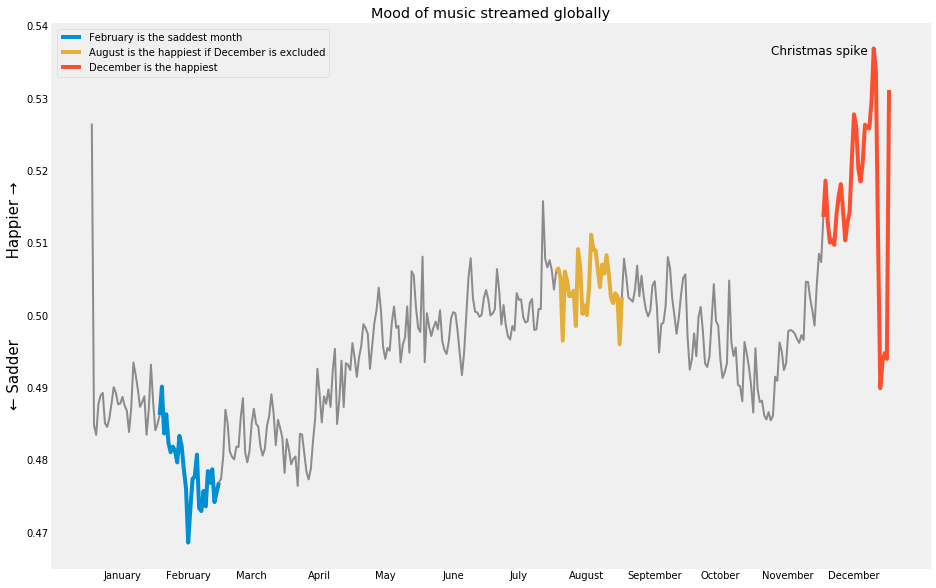

In [29]:
data = df_year['valence']

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February is the saddest month')
plt.plot(data[df_year[df_year['month'] == 8].index], c='#e5ae38', lw=4, label='August is the happiest if December is excluded')
plt.plot(data[df_year[df_year['month'] == 12].index], c='#fc4f30', lw=4, label='December is the happiest')
# plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.annotate('Christmas spike', (310, .536), fontsize=12)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

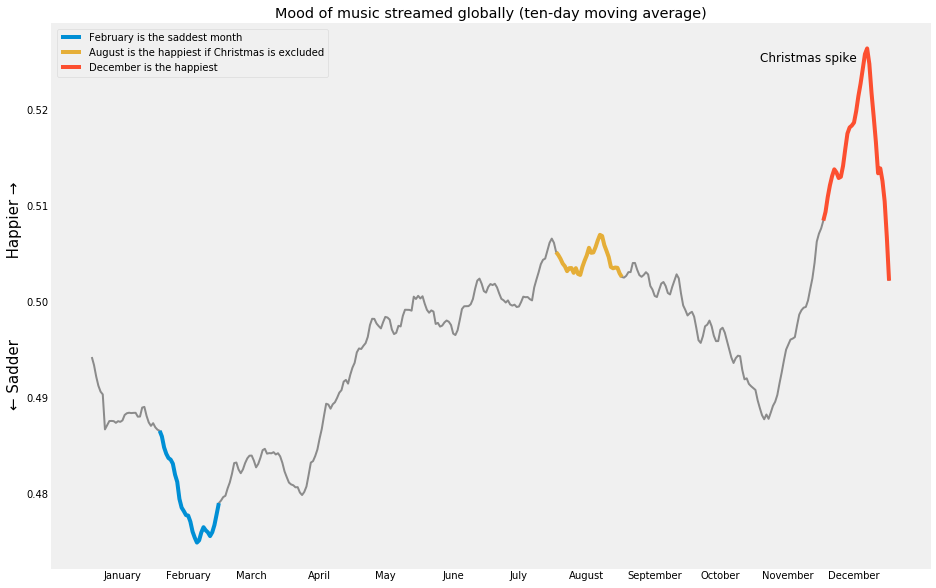

In [30]:
data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February is the saddest month')
plt.plot(data[df_year[df_year['month'] == 8].index], c='#e5ae38', lw=4, label='August is the happiest if Christmas is excluded')
plt.plot(data[df_year[df_year['month'] == 12].index], c='#fc4f30', lw=4, label='December is the happiest')
# plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.annotate('Christmas spike', (305, .525), fontsize=12)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


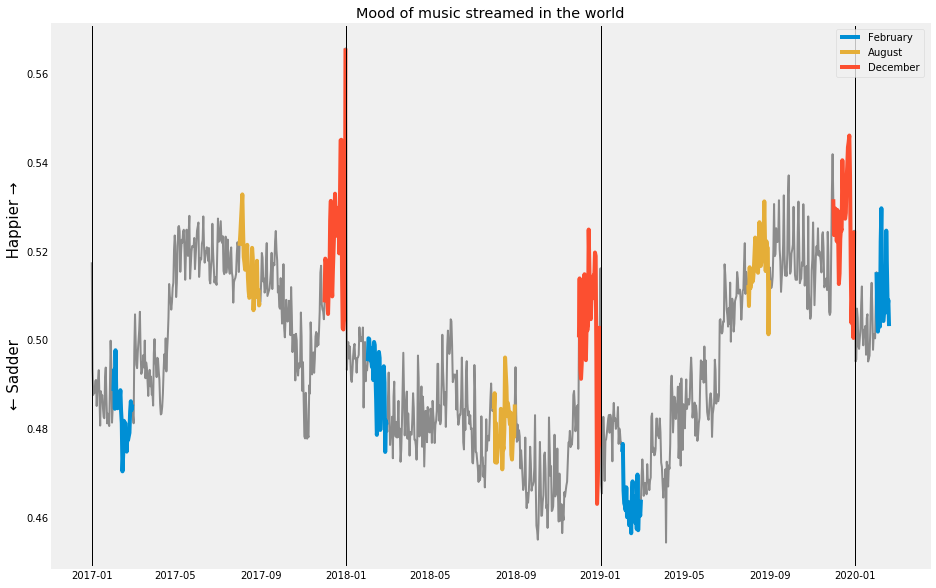

In [31]:
data = full_df[full_df['country'] == 'World'].groupby(['date'])['valence'].mean()

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data.loc['2017-02'], c='#008fd5', lw=4, label='February')
plt.plot(data.loc['2018-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2019-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2020-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2017-08'], c='#e5ae38', lw=4, label='August')
plt.plot(data.loc['2018-08'], c='#e5ae38', lw=4)
plt.plot(data.loc['2019-08'], c='#e5ae38', lw=4)
plt.plot(data.loc['2017-12'], c='#fc4f30', lw=4, label='December')
plt.plot(data.loc['2018-12'], c='#fc4f30', lw=4)
plt.plot(data.loc['2019-12'], c='#fc4f30', lw=4)
plt.axvline(x='2017-01-01', c='k', lw=1)
plt.axvline(x='2018-01-01', c='k', lw=1)
plt.axvline(x='2019-01-01', c='k', lw=1)
plt.axvline(x='2020-01-01', c='k', lw=1)
plt.legend(loc='upper right')
plt.grid(False)
plt.title('Mood of music streamed in the world')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

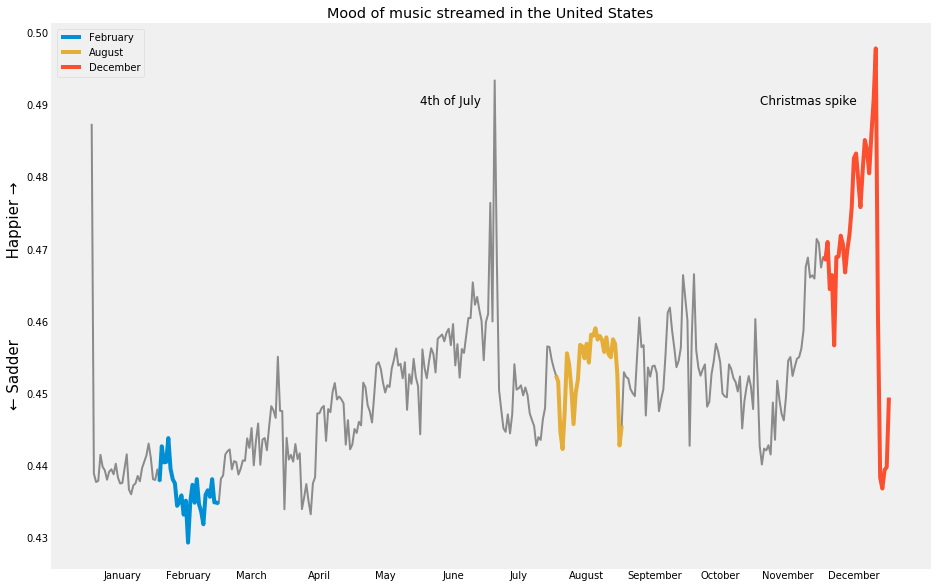

In [32]:
data = df[df['country'] == 'United States'].groupby(['month', 'day'], as_index=False)['valence'].mean()['valence']

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February')
plt.plot(data[df_year[df_year['month'] == 8].index], c='#e5ae38', lw=4, label='August')
plt.plot(data[df_year[df_year['month'] == 12].index], c='#fc4f30', lw=4, label='December')
# plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.annotate('Christmas spike', (305, .49), fontsize=12)
plt.annotate('4th of July', (150, .49), fontsize=12)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed in the United States')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

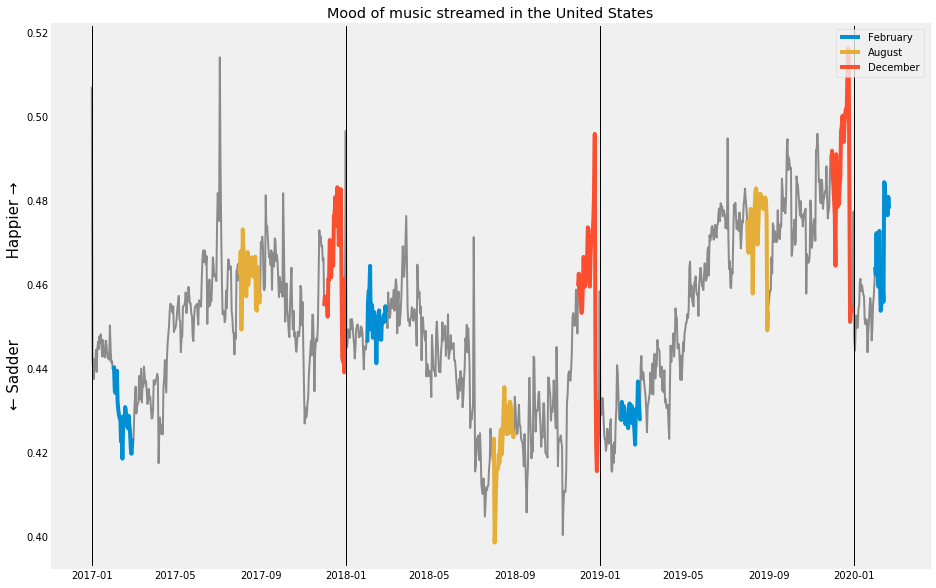

In [33]:
data = full_df[full_df['country'] == 'United States'].groupby(['date'])['valence'].mean()

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data.loc['2017-02'], c='#008fd5', lw=4, label='February')
plt.plot(data.loc['2018-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2019-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2020-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2017-08'], c='#e5ae38', lw=4, label='August')
plt.plot(data.loc['2018-08'], c='#e5ae38', lw=4)
plt.plot(data.loc['2019-08'], c='#e5ae38', lw=4)
plt.plot(data.loc['2017-12'], c='#fc4f30', lw=4, label='December')
plt.plot(data.loc['2018-12'], c='#fc4f30', lw=4)
plt.plot(data.loc['2019-12'], c='#fc4f30', lw=4)
plt.axvline(x='2017-01-01', c='k', lw=1)
plt.axvline(x='2018-01-01', c='k', lw=1)
plt.axvline(x='2019-01-01', c='k', lw=1)
plt.axvline(x='2020-01-01', c='k', lw=1)
plt.legend(loc='upper right')
plt.grid(False)
plt.title('Mood of music streamed in the United States')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

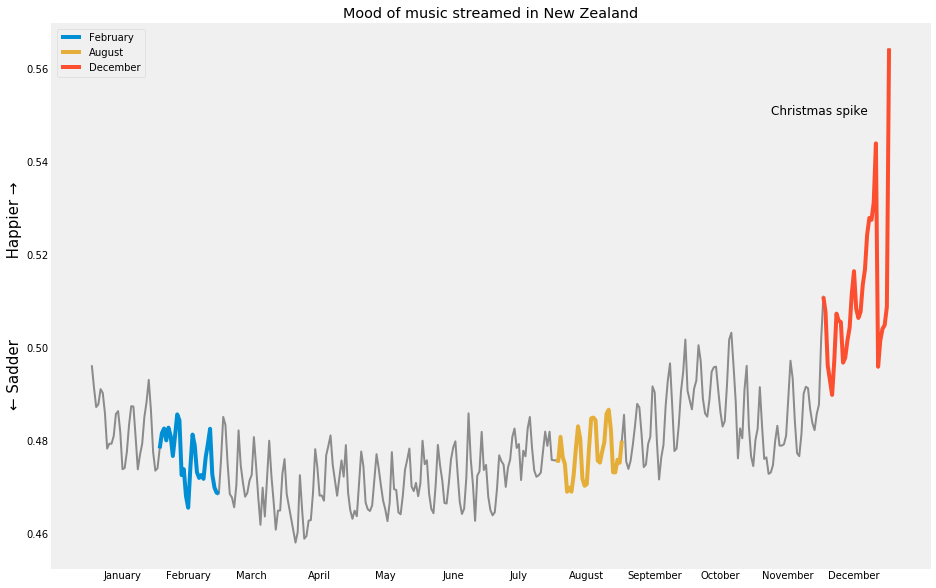

In [34]:
data = df[df['country'] == 'New Zealand'].groupby(['month', 'day'], as_index=False)['valence'].mean()['valence']

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February')
plt.plot(data[df_year[df_year['month'] == 8].index], c='#e5ae38', lw=4, label='August')
plt.plot(data[df_year[df_year['month'] == 12].index], c='#fc4f30', lw=4, label='December')
# plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.annotate('Christmas spike', (310, .55), fontsize=12)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed in New Zealand')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

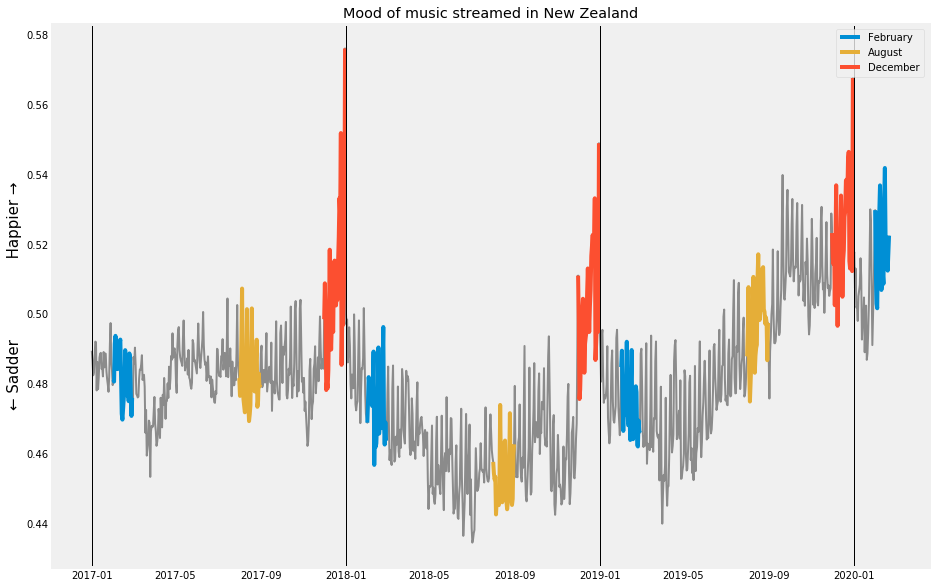

In [35]:
data = full_df[full_df['country'] == 'New Zealand'].groupby(['date'])['valence'].mean()

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data.loc['2017-02'], c='#008fd5', lw=4, label='February')
plt.plot(data.loc['2018-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2019-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2020-02'], c='#008fd5', lw=4)
plt.plot(data.loc['2017-08'], c='#e5ae38', lw=4, label='August')
plt.plot(data.loc['2018-08'], c='#e5ae38', lw=4)
plt.plot(data.loc['2019-08'], c='#e5ae38', lw=4)
plt.plot(data.loc['2017-12'], c='#fc4f30', lw=4, label='December')
plt.plot(data.loc['2018-12'], c='#fc4f30', lw=4)
plt.plot(data.loc['2019-12'], c='#fc4f30', lw=4)
plt.axvline(x='2017-01-01', c='k', lw=1)
plt.axvline(x='2018-01-01', c='k', lw=1)
plt.axvline(x='2019-01-01', c='k', lw=1)
plt.axvline(x='2020-01-01', c='k', lw=1)
plt.legend(loc='upper right')
plt.grid(False)
plt.title('Mood of music streamed in New Zealand')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

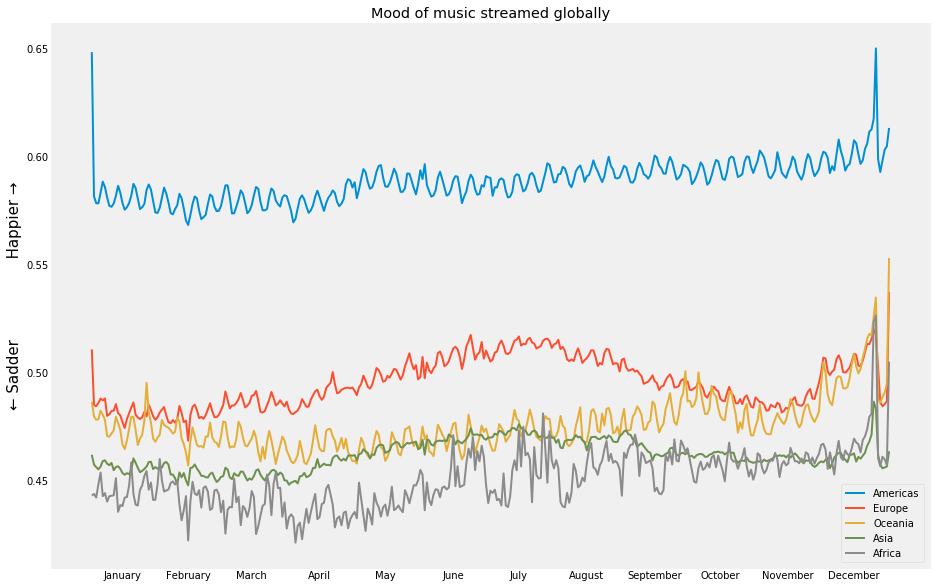

In [36]:
plt.figure(figsize=(14, 10))

for region in df['Region Name'].unique():
    if isinstance(region, str):
        df_year = df[df['Region Name'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence']
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

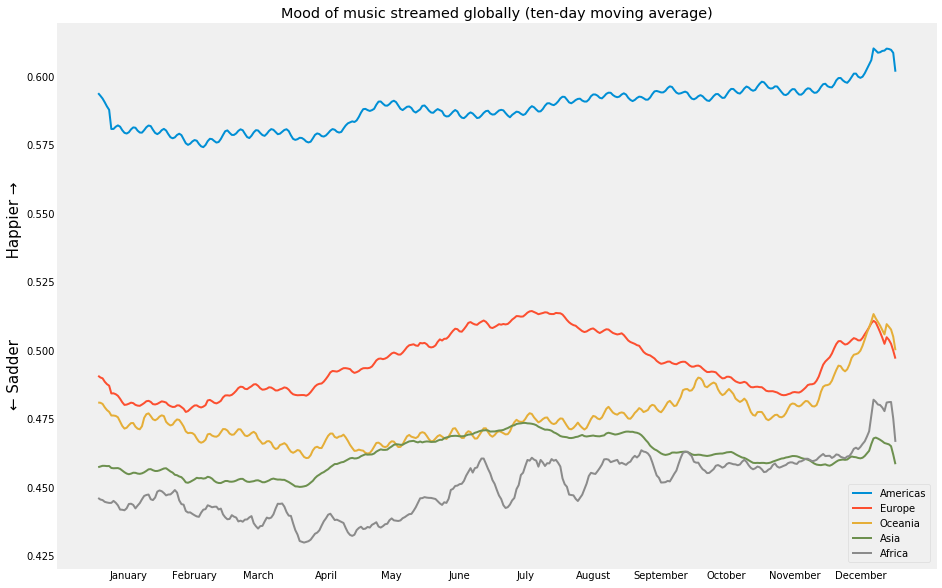

In [37]:
plt.figure(figsize=(14, 10))

for region in df['Region Name'].unique():
    if isinstance(region, str):
        df_year = df[df['Region Name'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

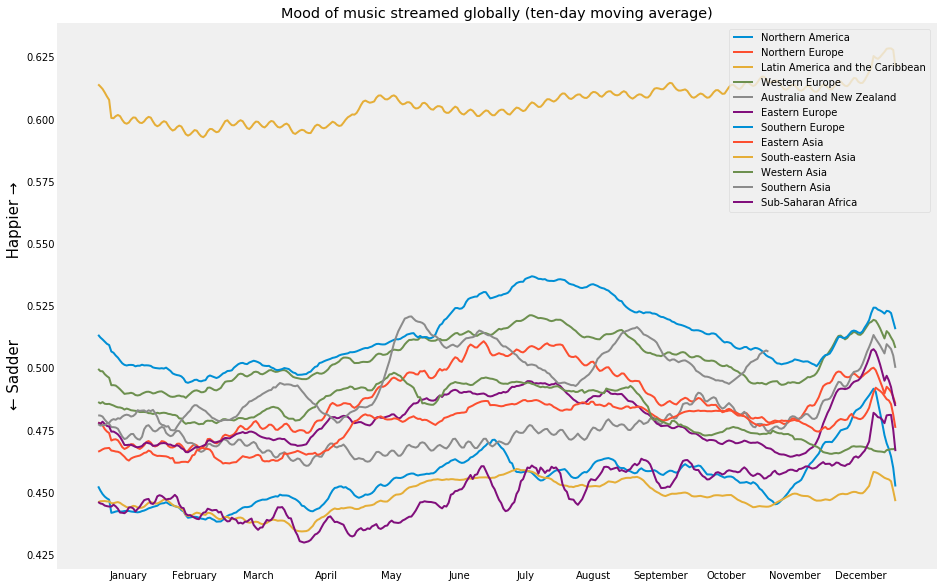

In [38]:
plt.figure(figsize=(14, 10))

for region in df['Sub-region Name'].unique():
    if isinstance(region, str):
        df_year = df[df['Sub-region Name'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

In [39]:
df.groupby('dayofweek')['valence'].mean()

dayofweek
0    0.514728
1    0.514528
2    0.514477
3    0.515686
4    0.517766
5    0.522903
6    0.519864
Name: valence, dtype: float64

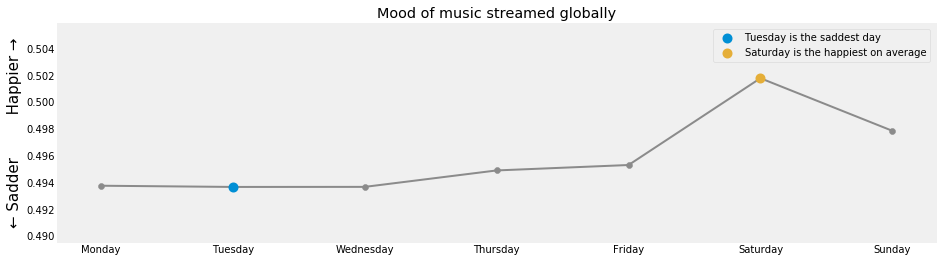

In [40]:
data = df[df['country'] == 'World'].groupby(['dayofweek'])['valence'].mean()

plt.figure(figsize=(14, 4))
plt.plot(data, c='#8b8b8b')
plt.scatter(data.index, data, c='#8b8b8b')
plt.scatter(1, data[1], c='#008fd5', lw=4, label='Tuesday is the saddest day', zorder=3)
plt.scatter(5, data[5], c='#e5ae38', lw=4, label='Saturday is the happiest on average', zorder=3)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

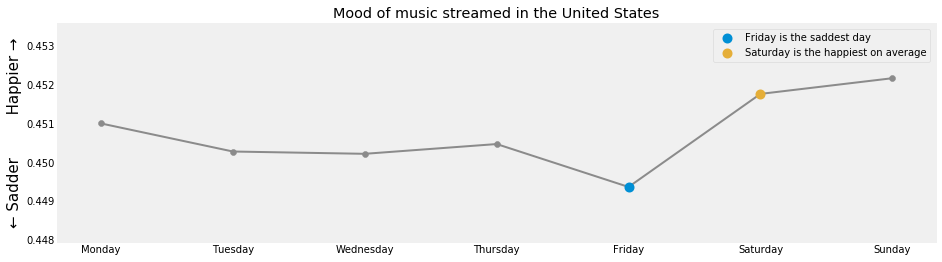

In [41]:
data = df[df['country'] == 'United States'].groupby(['dayofweek'])['valence'].mean()

plt.figure(figsize=(14, 4))
plt.plot(data, c='#8b8b8b')
plt.scatter(data.index, data, c='#8b8b8b')
plt.scatter(4, data[4], c='#008fd5', lw=4, label='Friday is the saddest day', zorder=3)
plt.scatter(5, data[5], c='#e5ae38', lw=4, label='Saturday is the happiest on average', zorder=3)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed in the United States')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

In [42]:
df[df['country'] == 'New Zealand'].groupby(['dayofweek'])['valence'].mean()

dayofweek
0    0.474857
1    0.475032
2    0.475737
3    0.477498
4    0.485714
5    0.493054
6    0.479048
Name: valence, dtype: float64

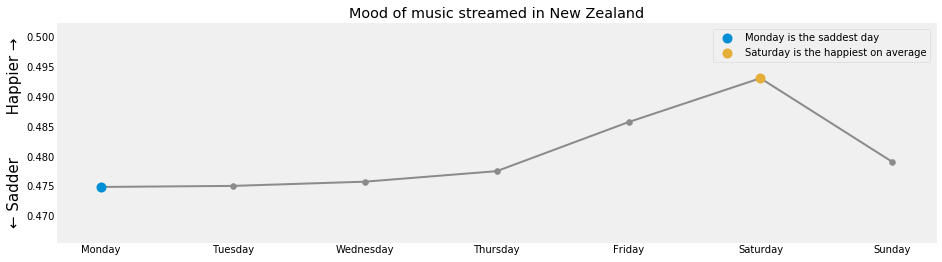

In [43]:
data = df[df['country'] == 'New Zealand'].groupby(['dayofweek'])['valence'].mean()

plt.figure(figsize=(14, 4))
plt.plot(data, c='#8b8b8b')
plt.scatter(data.index, data, c='#8b8b8b')
plt.scatter(0, data[0], c='#008fd5', lw=4, label='Monday is the saddest day', zorder=3)
plt.scatter(5, data[5], c='#e5ae38', lw=4, label='Saturday is the happiest on average', zorder=3)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed in New Zealand')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

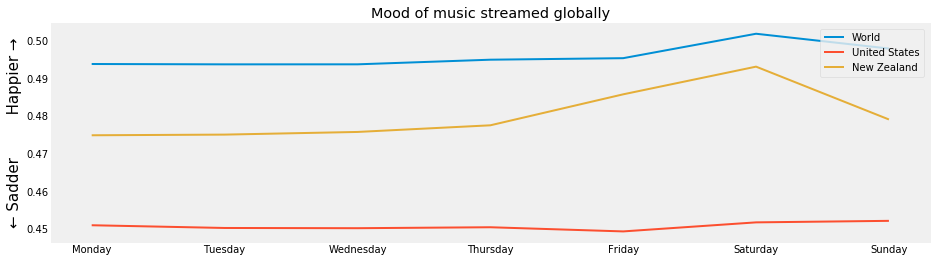

In [44]:
plt.figure(figsize=(14, 4))
plt.plot(df[df['country'] == 'World'].groupby(['dayofweek'])['valence'].mean(), label='World')
plt.plot(df[df['country'] == 'United States'].groupby(['dayofweek'])['valence'].mean(), label='United States')
plt.plot(df[df['country'] == 'New Zealand'].groupby(['dayofweek'])['valence'].mean(), label='New Zealand')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

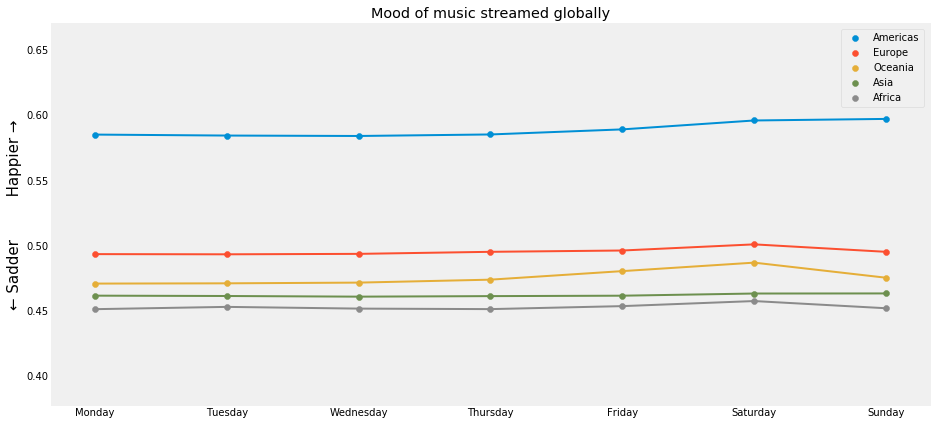

In [45]:
plt.figure(figsize=(14, 7))
for region in df['Region Name'].unique():
    if isinstance(region, str):
        data = df[df['Region Name'] == region].groupby(['dayofweek'])['valence'].mean()
        plt.plot(data)
        plt.scatter(data.index, data, label=region)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data = df.groupby(['Region Name', 'dayofweek'])['valence'].mean()
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

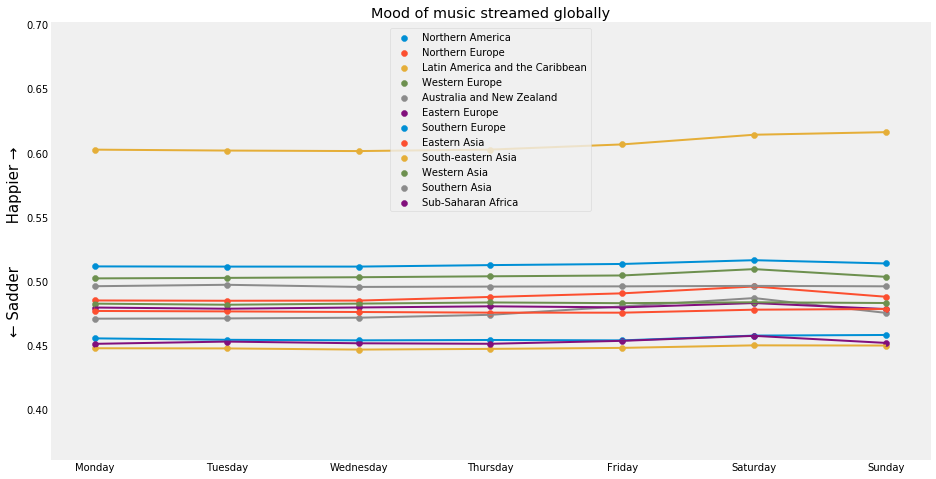

In [46]:
plt.figure(figsize=(14, 8))
for region in df['Sub-region Name'].unique():
    if isinstance(region, str):
        data = df[df['Sub-region Name'] == region].groupby(['dayofweek'])['valence'].mean()
        plt.plot(data)
        plt.scatter(data.index, data, label=region)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data = df.groupby(['Sub-region Name', 'dayofweek'])['valence'].mean()
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

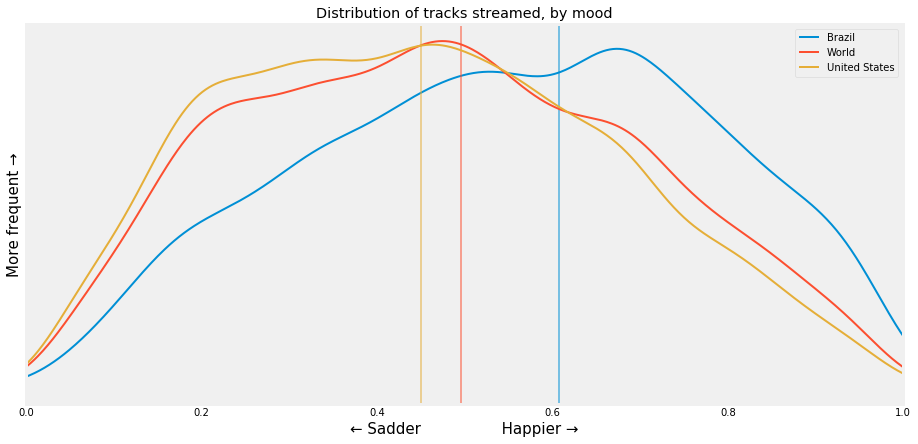

In [47]:
plt.figure(figsize=(14, 7))

df[df['country'] == 'Brazil'].groupby(['track_id'])['valence'].mean().plot.kde(label='Brazil')
plt.axvline(x=df[df['country'] == 'Brazil']['valence'].mean(), c='#008fd5', alpha=.5)

df[df['country'] == 'World'].groupby(['track_id'])['valence'].mean().plot.kde(label='World')
plt.axvline(x=df[df['country'] == 'World']['valence'].mean(), c='#fc4f30', alpha=.5)

df[df['country'] == 'United States'].groupby(['track_id'])['valence'].mean().plot.kde(label='United States')
plt.axvline(x=df[df['country'] == 'United States']['valence'].mean(), c='#e5ae38', alpha=.5)

plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()

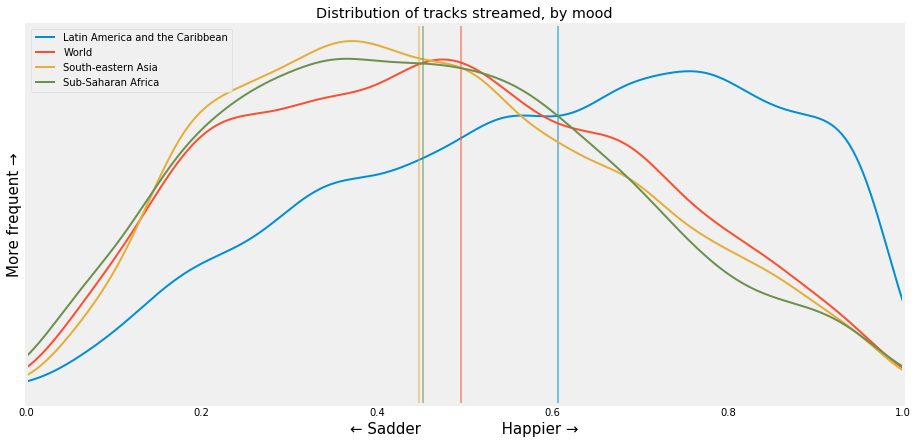

In [48]:
plt.figure(figsize=(14, 7))

df[df['Sub-region Name'] == 'Latin America and the Caribbean'].groupby(['track_id'])['valence'].mean().plot.kde(label='Latin America and the Caribbean')
plt.axvline(x=df[df['Sub-region Name'] == 'Latin America and the Caribbean']['valence'].mean(), c='#008fd5', alpha=.5)

df[df['country'] == 'World'].groupby(['track_id'])['valence'].mean().plot.kde(label='World')
plt.axvline(x=df[df['country'] == 'World']['valence'].mean(), c='#fc4f30', alpha=.5)

df[df['Sub-region Name'] == 'South-eastern Asia'].groupby(['track_id'])['valence'].mean().plot.kde(label='South-eastern Asia')
plt.axvline(x=df[df['Sub-region Name'] == 'South-eastern Asia']['valence'].mean(), c='#e5ae38', alpha=.5)

df[df['Sub-region Name'] == 'Sub-Saharan Africa'].groupby(['track_id'])['valence'].mean().plot.kde(label='Sub-Saharan Africa')
plt.axvline(x=df[df['Sub-region Name'] == 'Sub-Saharan Africa']['valence'].mean(), c='#6d904f', alpha=.5)

plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()

In [49]:
df['region'] = df['Region Name'] + ' - ' + df['Sub-region Name']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df['region'].unique()

array([nan, 'Americas - Northern America', 'Europe - Northern Europe',
       'Americas - Latin America and the Caribbean',
       'Europe - Western Europe', 'Oceania - Australia and New Zealand',
       'Europe - Eastern Europe', 'Europe - Southern Europe',
       'Asia - Eastern Asia', 'Asia - South-eastern Asia',
       'Asia - Western Asia', 'Asia - Southern Asia',
       'Africa - Sub-Saharan Africa'], dtype=object)

In [51]:
df.loc[df['Country'] == 'global', 'region'] = 'World'
df.loc[df['Country'] == 'tw', 'region'] = 'Asia - Eastern Asia'
df.loc[df['region'] == 'Europe - Northern Europe', 'region'] = 'Europe'
df.loc[df['region'] == 'Europe - Western Europe', 'region'] = 'Europe'
df.loc[df['region'] == 'Europe - Eastern Europe', 'region'] = 'Europe'
df.loc[df['region'] == 'Europe - Southern Europe', 'region'] = 'Europe'
df.loc[df['region'] == 'Americas - Latin America and the Caribbean', 'region'] = 'South America'
df.loc[df['region'] == 'Americas - Northern America', 'region'] = 'North America'
df.loc[df['region'] == 'Africa - Sub-Saharan Africa', 'region'] = 'Africa'
df.loc[df['region'] == 'Asia - Eastern Asia', 'region'] = 'Asia'
df.loc[df['region'] == 'Asia - South-eastern Asia', 'region'] = 'Asia'
df.loc[df['region'] == 'Asia - Western Asia', 'region'] = 'Asia'
df.loc[df['region'] == 'Asia - Southern Asia', 'region'] = 'Asia'
df.loc[df['region'] == 'Oceania - Australia and New Zealand', 'region'] = 'Australia'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
df[df['region'].apply(lambda x: not isinstance(x, str))]

,Position,Track Name,Artist,Streams,URL,Country,Date,cc,Continent,Region Name,...,uri,track_href,analysis_url,duration_ms,time_signature,date,month,day,dayofweek,region


In [53]:
df['region'].unique()

array(['World', 'North America', 'Europe', 'South America', 'Australia',
       'Asia', 'Africa'], dtype=object)

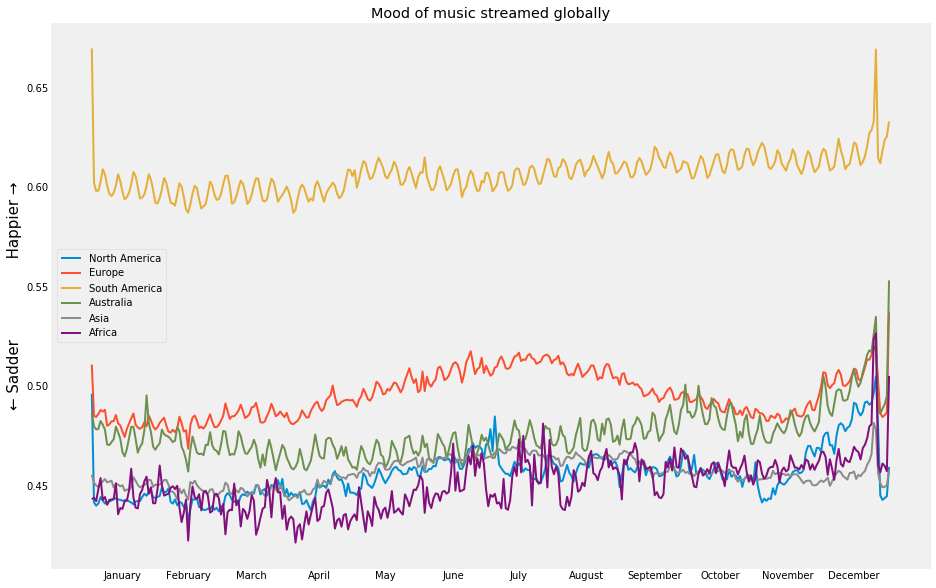

In [54]:
plt.figure(figsize=(14, 10))

for region in df['region'].unique():
    if region != 'World':
        df_year = df[df['region'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence']
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

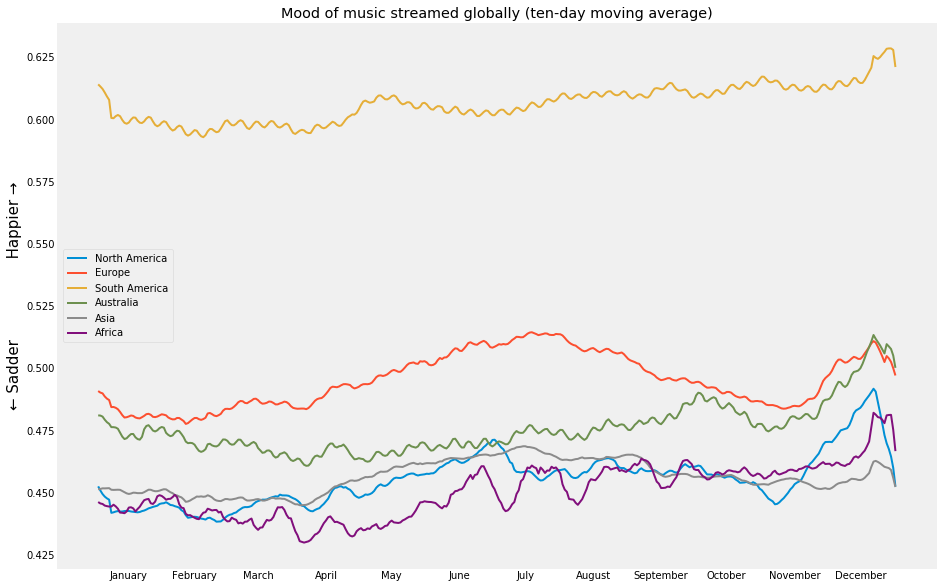

In [55]:
plt.figure(figsize=(14, 10))

for region in df['region'].unique():
    if region != 'World':
        df_year = df[df['region'] == region].groupby(['month', 'day'], as_index=False)['valence'].mean()
        data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(data, label=region)
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

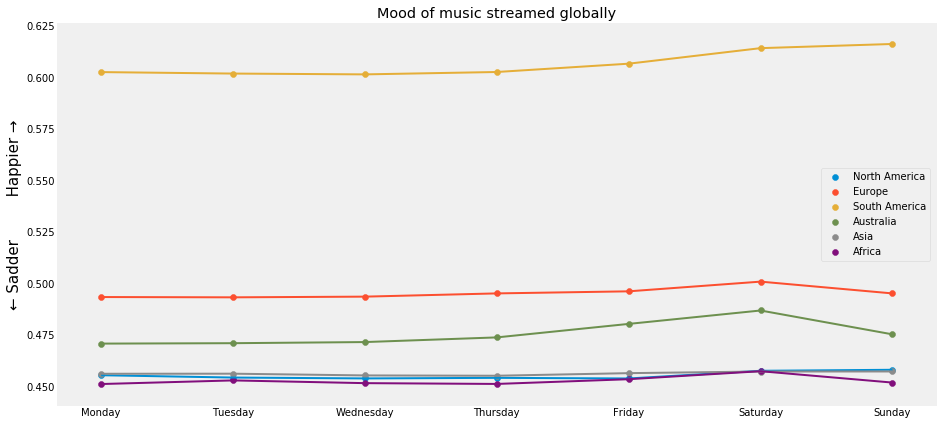

In [56]:
plt.figure(figsize=(14, 7))
for region in df['region'].unique():
    if region != 'World':
        data = df[df['region'] == region].groupby(['dayofweek'])['valence'].mean()
        plt.plot(data)
        plt.scatter(data.index, data, label=region)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data = df.groupby(['Region Name', 'dayofweek'])['valence'].mean()
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

In [57]:
regions = [(df[df['region'] == region].groupby(['region'])['valence'].mean().tolist(), region) for region in df['region'].unique()]
regions.sort(key=lambda x: x[0], reverse=True)
regions

[([0.6064241976311571], 'South America'),
 ([0.4958509409593528], 'World'),
 ([0.4953447728871207], 'Europe'),
 ([0.47564482980179756], 'Australia'),
 ([0.4562676805938802], 'Asia'),
 ([0.45534996352716817], 'North America'),
 ([0.45286574209141234], 'Africa')]

In [58]:
df[df['region'] == 'World'].groupby(['month'])['valence'].mean()

month
1     0.488763
2     0.478776
3     0.483192
4     0.486186
5     0.497764
6     0.499311
7     0.501656
8     0.504247
9     0.502332
10    0.494994
11    0.495437
12    0.516192
Name: valence, dtype: float64

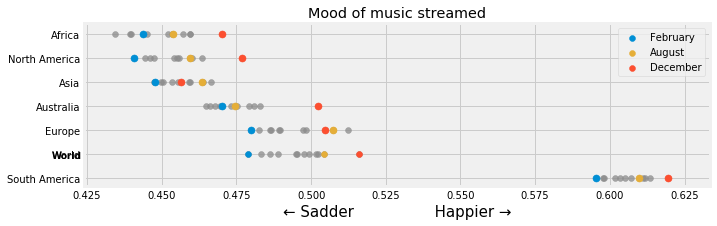

In [59]:
plt.figure(figsize=(10, 3))
for region in regions:
    region = region[1]
    data = df[df['region'] == region].groupby(['month'])['valence'].mean().tolist()
    if region == 'World':
#         plt.axhline(region, linestyle='--', linewidth=2, c='k')
        plt.scatter(data, [region] * len(data), c='#8b8b8b', s=35, alpha=.75, zorder=5)
        plt.scatter(data[1], region, c='#008fd5', s=35, label='February', zorder=5)
        plt.scatter(data[7], region, c='#e5ae38', s=35, label='August', zorder=5)
        plt.scatter(data[11], region, c='#fc4f30', s=35, label='December', zorder=5)
    else:
        if len(data) == 12:
            plt.scatter(data, [region] * len(data), c='#8b8b8b', s=35, alpha=.75)
            plt.scatter(data[1], region, c='#008fd5', s=50)
            plt.scatter(data[7], region, c='#e5ae38', s=50)
            plt.scatter(data[11], region, c='#fc4f30', s=50)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.text(.4233, .963, 'World', fontweight='bold', fontsize=9, horizontalalignment='right', verticalalignment='center')
plt.show()

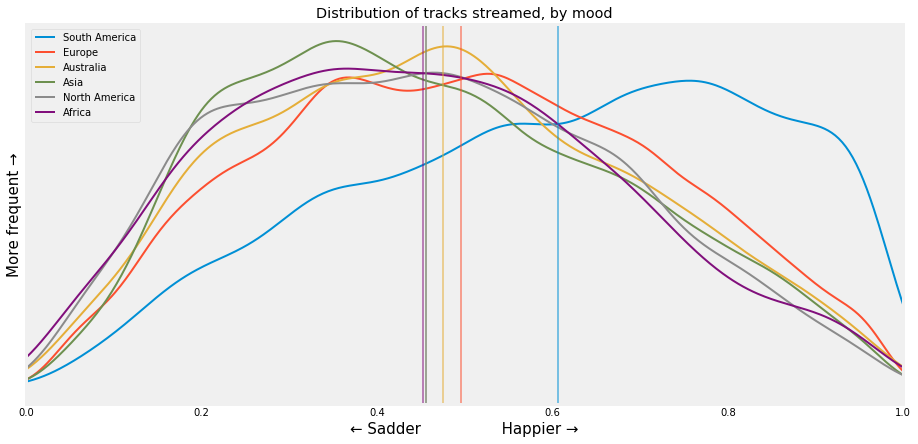

In [60]:
plt.figure(figsize=(14, 7))

for region in regions:
    region = region[1]
    if region != 'World':
        df[df['region'] == region].groupby(['track_id'])['valence'].mean().plot.kde(label=region)
plt.axvline(x=df[df['region'] == 'South America']['valence'].mean(), alpha=.5, c='#008fd5')
plt.axvline(x=df[df['region'] == 'Europe']['valence'].mean(), alpha=.5, c='#fc4f30')
plt.axvline(x=df[df['region'] == 'Australia']['valence'].mean(), alpha=.5, c='#e5ae38')
plt.axvline(x=df[df['region'] == 'Asia']['valence'].mean(), alpha=.5, c='#6d904f')
plt.axvline(x=df[df['region'] == 'North America']['valence'].mean(), alpha=.5, c='#8b8b8b')
plt.axvline(x=df[df['region'] == 'Africa']['valence'].mean(), alpha=.5, c='#810f7c')

plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()

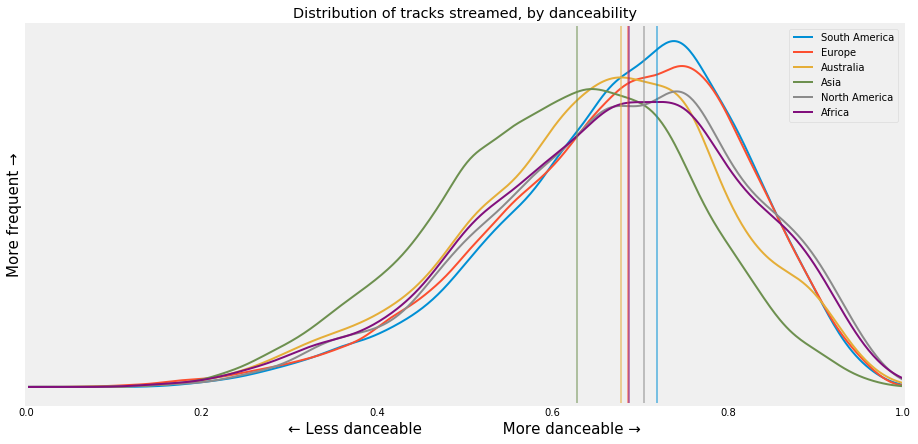

In [61]:
plt.figure(figsize=(14, 7))

for region in regions:
    region = region[1]
    if region != 'World':
        df[df['region'] == region].groupby(['track_id'])['danceability'].mean().plot.kde(label=region)
plt.axvline(x=df[df['region'] == 'South America']['danceability'].mean(), alpha=.5, c='#008fd5')
plt.axvline(x=df[df['region'] == 'Europe']['danceability'].mean(), alpha=.5, c='#fc4f30')
plt.axvline(x=df[df['region'] == 'Australia']['danceability'].mean(), alpha=.5, c='#e5ae38')
plt.axvline(x=df[df['region'] == 'Asia']['danceability'].mean(), alpha=.5, c='#6d904f')
plt.axvline(x=df[df['region'] == 'North America']['danceability'].mean(), alpha=.5, c='#8b8b8b')
plt.axvline(x=df[df['region'] == 'Africa']['danceability'].mean(), alpha=.5, c='#810f7c')

plt.legend()
plt.xlabel(u'\u2190 Less danceable                 More danceable \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by danceability')
plt.show()

In [62]:
x = df.groupby(['date', 'region'], as_index=False)['valence'].mean().pivot(index='date', columns='region', values='valence')
x.drop('World', axis=1, inplace=True)
x.dropna(inplace=True)
x

region,Africa,Asia,Australia,Europe,North America,South America
date,,,,,,
2018-04-20,0.438074,0.446945,0.460712,0.491100,0.446740,0.583925
2018-04-21,0.446549,0.451992,0.462610,0.502707,0.457044,0.586687
2018-04-26,0.436715,0.448594,0.458447,0.490379,0.452060,0.584230
2018-04-27,0.417924,0.444235,0.455002,0.483431,0.442985,0.587276
2018-04-28,0.414926,0.448516,0.460607,0.488665,0.444762,0.594993
...,...,...,...,...,...,...
2019-12-27,0.468443,0.458183,0.500109,0.491251,0.460917,0.639416
2019-12-28,0.468616,0.456288,0.505276,0.488978,0.461007,0.647155
2019-12-29,0.467367,0.456140,0.504094,0.486570,0.458707,0.649933


<Figure size 1008x720 with 0 Axes>

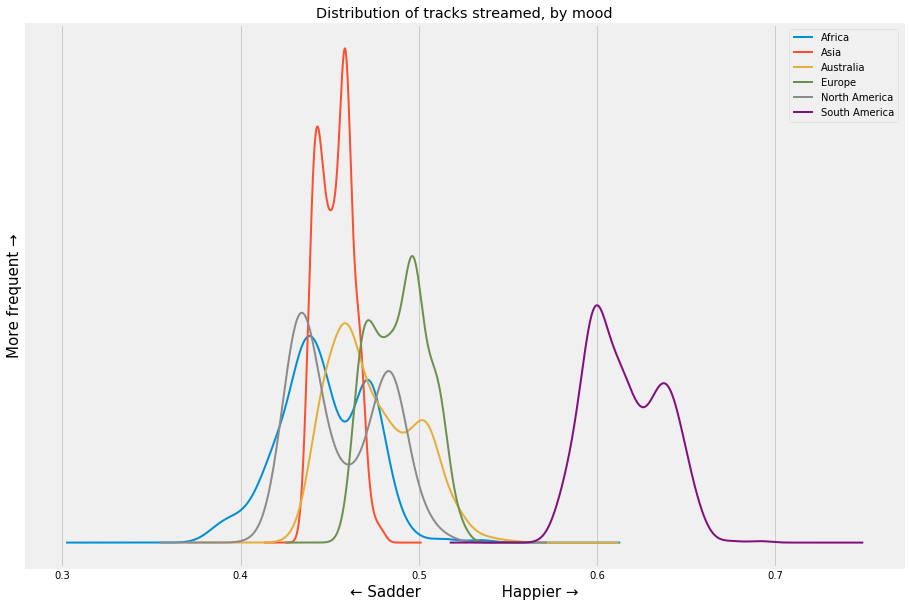

In [63]:
plt.figure(figsize=(14, 10))
x.plot.kde(figsize=(14, 10))
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.yticks([])
# plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()

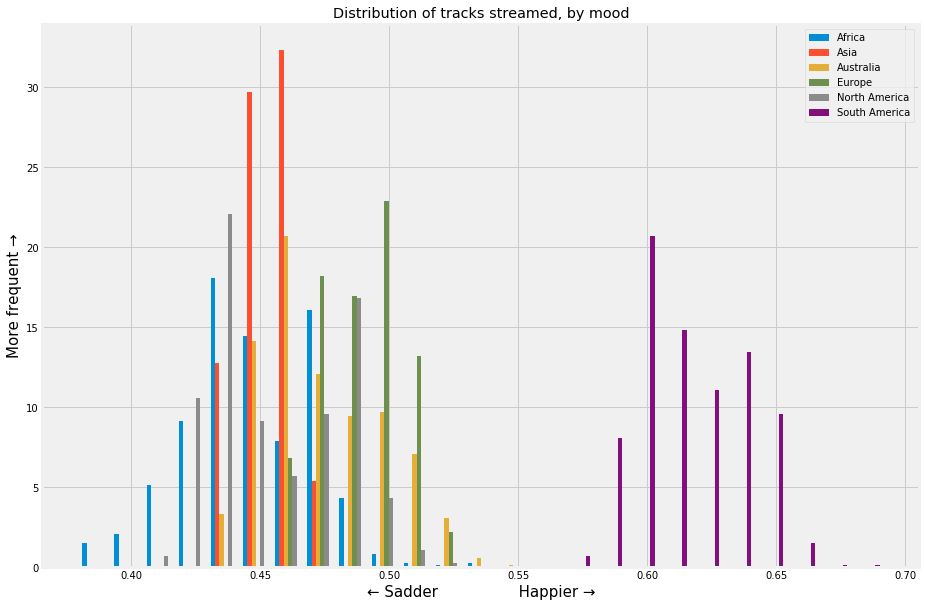

In [64]:
plt.figure(figsize=(14, 10))
plt.hist(x.T, bins=25, density=True, histtype='bar', label=x.columns)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
# plt.yticks([])
# plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()

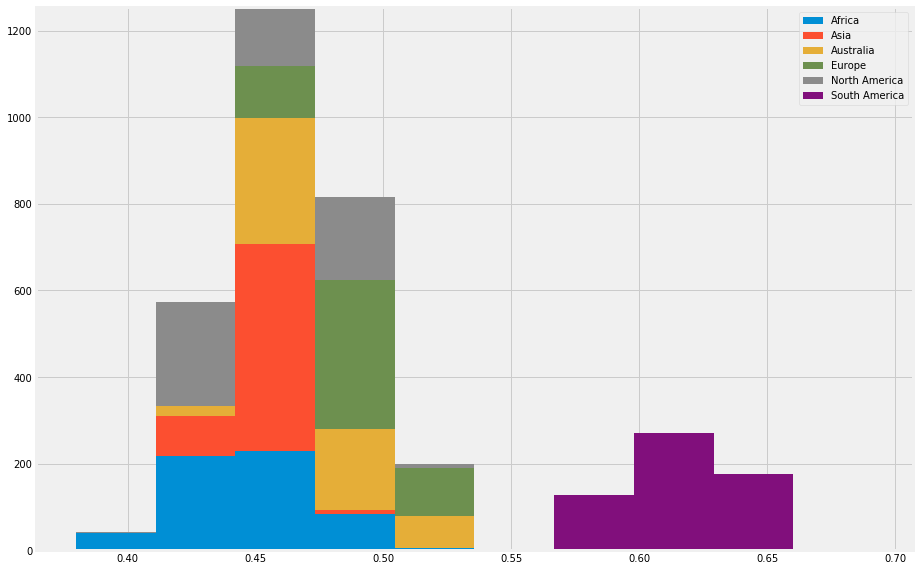

In [65]:
plt.figure(figsize=(14, 10))
plt.hist(x.T, bins=10, density=None, histtype='barstacked', label=x.columns)
plt.legend()
plt.show()

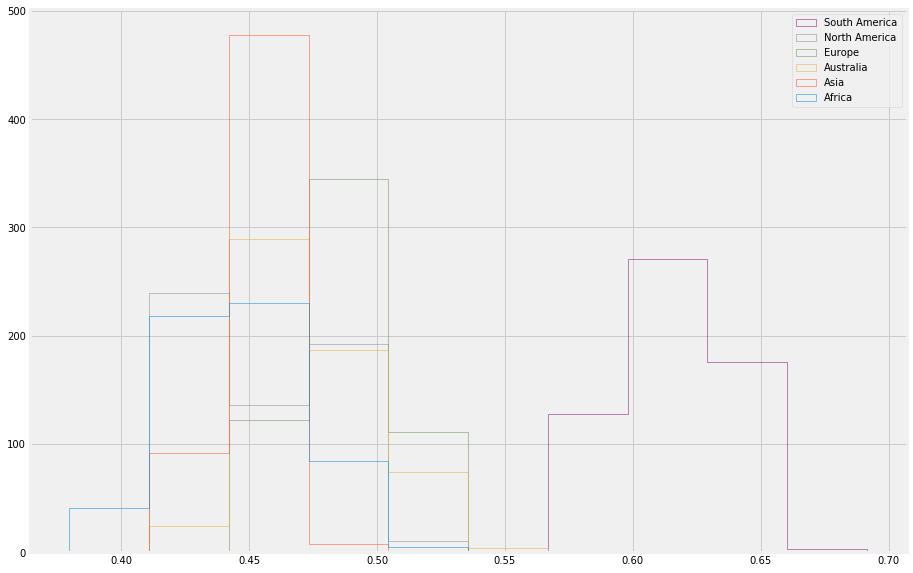

In [66]:
plt.figure(figsize=(14, 10))
plt.hist(x.T, bins=10, density=None, histtype='step', label=x.columns)
plt.legend()
plt.show()

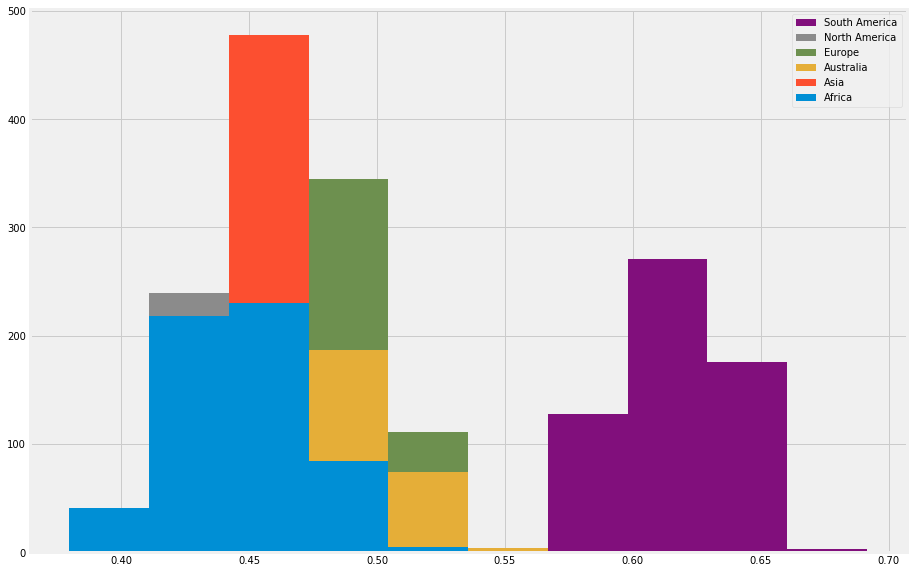

In [67]:
plt.figure(figsize=(14, 10))
plt.hist(x.T, bins=10, density=None, histtype='stepfilled', label=x.columns)
plt.legend()
plt.show()

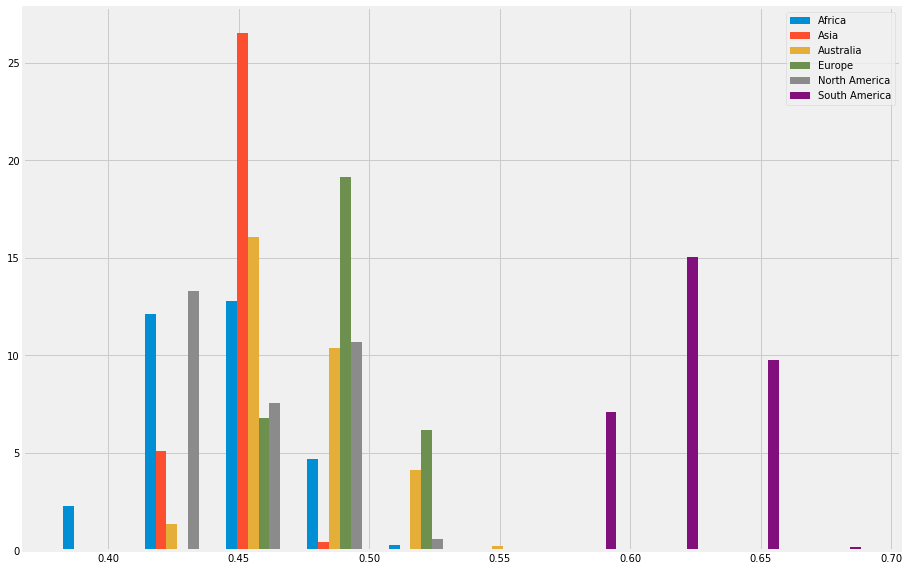

In [68]:
plt.figure(figsize=(14, 10))
plt.hist(x.T, bins=10, density=True, histtype='bar', label=x.columns)
plt.legend()
plt.show()

In [69]:
x = df.groupby(['Position', 'date', 'region'], as_index=False)['valence'].mean()

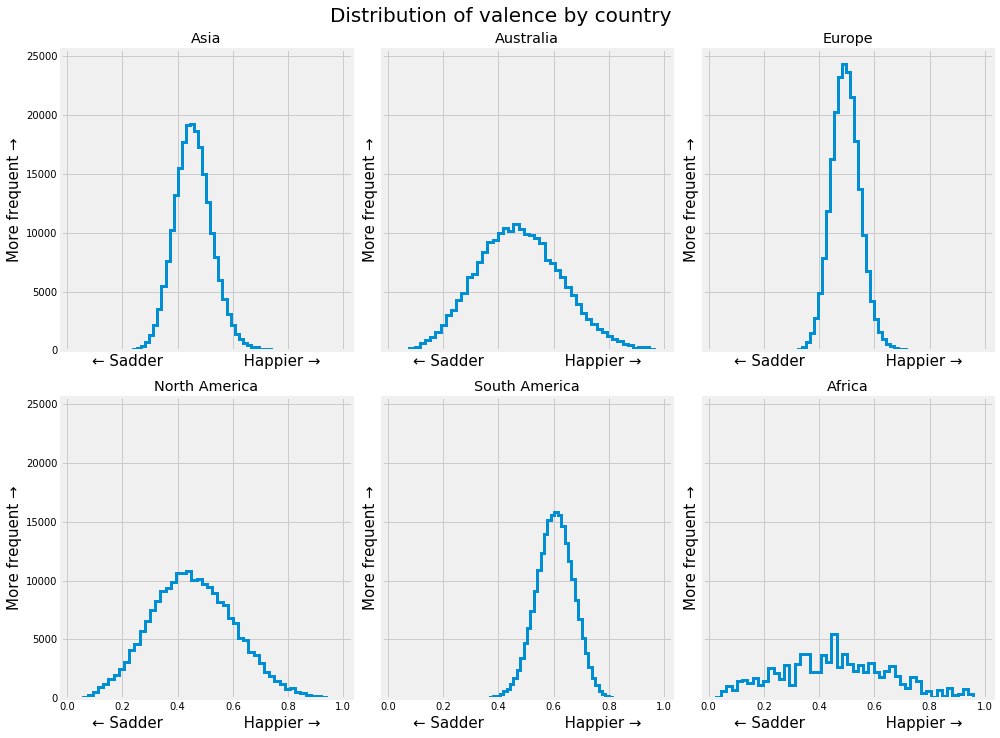

In [70]:
regions = x['region'].unique().tolist()
regions.remove('World')

fig, ax = plt.subplots(2, 3, figsize=(14, 10), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.suptitle('Distribution of valence by country', fontsize=20, y=1.02)
fig.subplots_adjust(top=0.88)

ax = ax.ravel()

for idx, region in enumerate(regions):
    ax[idx].hist(x[x['region'] == region]['valence'], bins=50, histtype='step', linewidth=3)
    ax[idx].set_title(region)
    ax[idx].set_xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
    ax[idx].set_ylabel('More frequent \u2192', fontsize=15, rotation=90)
    
fig.tight_layout()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.show()

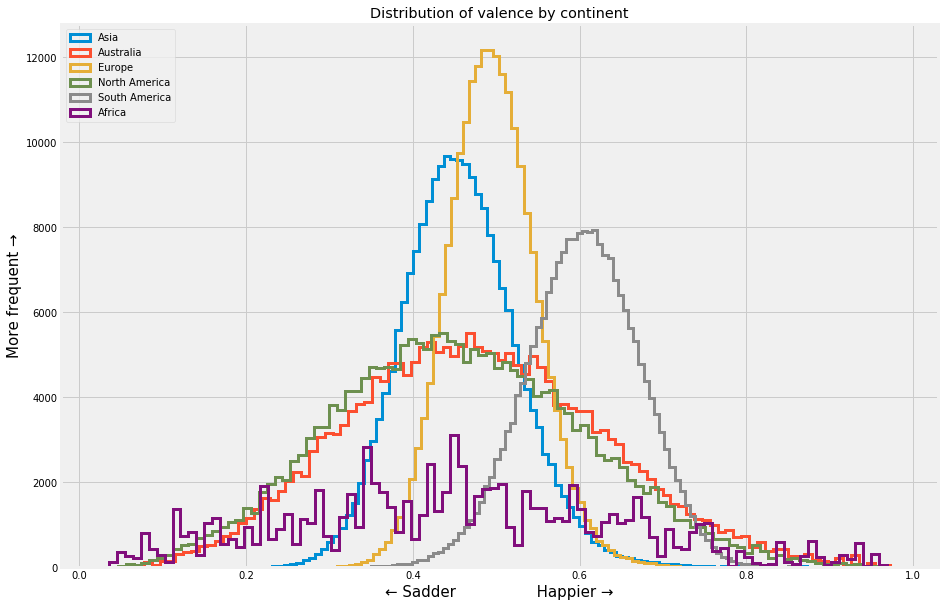

In [71]:
regions = x['region'].unique().tolist()
regions.remove('World')

plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by continent')

for idx, region in enumerate(regions):
    plt.hist(x[x['region'] == region]['valence'], bins=100, histtype='step', linewidth=3, label=region)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.show()

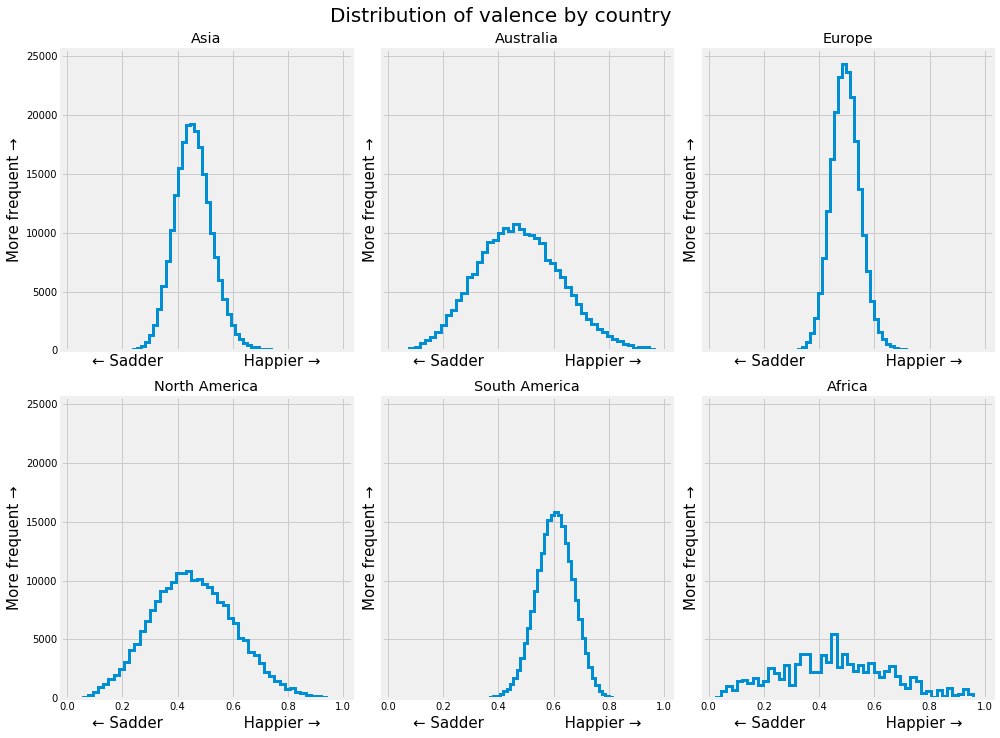

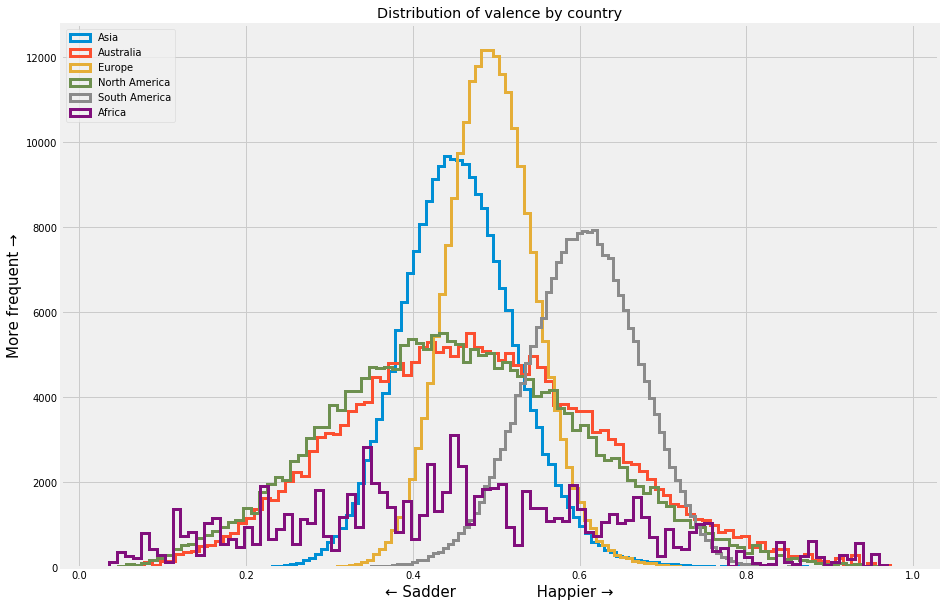

In [72]:
x = df.groupby(['Position', 'date', 'region'], as_index=False)['valence'].mean()

regions = x['region'].unique().tolist()
regions.remove('World')
fig, ax = plt.subplots(2, 3, figsize=(14, 10), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.suptitle('Distribution of valence by country', fontsize=20, y=1.02)
fig.subplots_adjust(top=0.88)
ax = ax.ravel()
for idx, region in enumerate(regions):
    ax[idx].hist(x[x['region'] == region]['valence'], bins=50, histtype='step', linewidth=3)
    ax[idx].set_title(region)
    ax[idx].set_xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
    ax[idx].set_ylabel('More frequent \u2192', fontsize=15, rotation=90)
fig.tight_layout()
plt.show()

regions = x['region'].unique().tolist()
regions.remove('World')
plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by country')
for idx, region in enumerate(regions):
    plt.hist(x[x['region'] == region]['valence'], bins=100, histtype='step', linewidth=3, label=region)
    plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
    plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.legend()
plt.show()

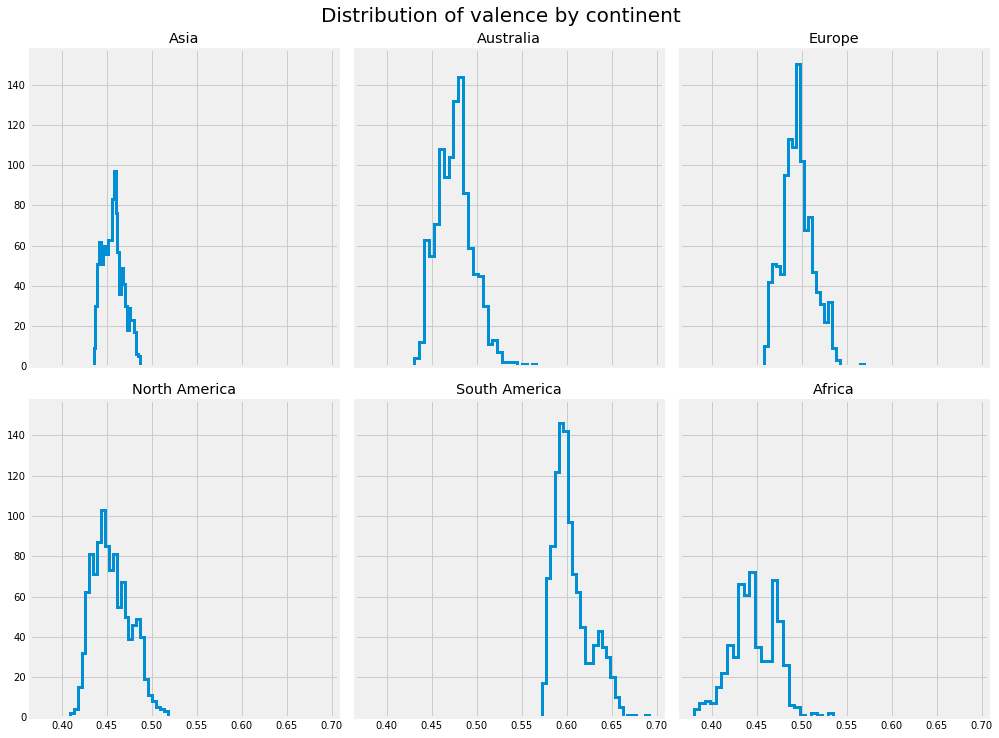

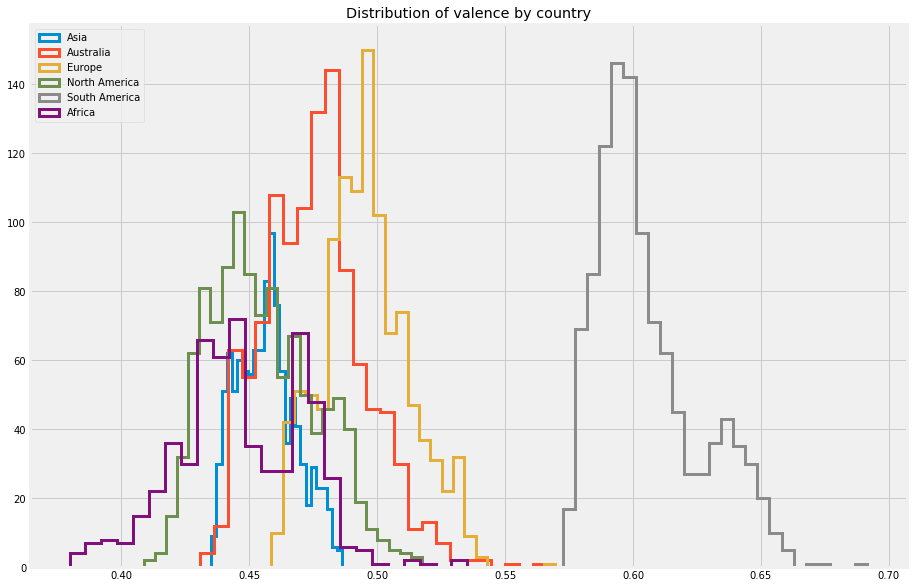

In [73]:
x = df.groupby(['date', 'region'], as_index=False)['valence'].mean()

regions = x['region'].unique().tolist()
regions.remove('World')
fig, ax = plt.subplots(2, 3, figsize=(14, 10), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.suptitle('Distribution of valence by continent', fontsize=20, y=1.02)
fig.subplots_adjust(top=0.88)
ax = ax.ravel()
for idx, region in enumerate(regions):
    ax[idx].hist(x[x['region'] == region]['valence'], bins=25, histtype='step', linewidth=3)
    ax[idx].set_title(region)
fig.tight_layout()
plt.show()

regions = x['region'].unique().tolist()
regions.remove('World')
plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by country')
for idx, region in enumerate(regions):
    plt.hist(x[x['region'] == region]['valence'], bins=25, histtype='step', linewidth=3, label=region)
plt.legend()
plt.show()

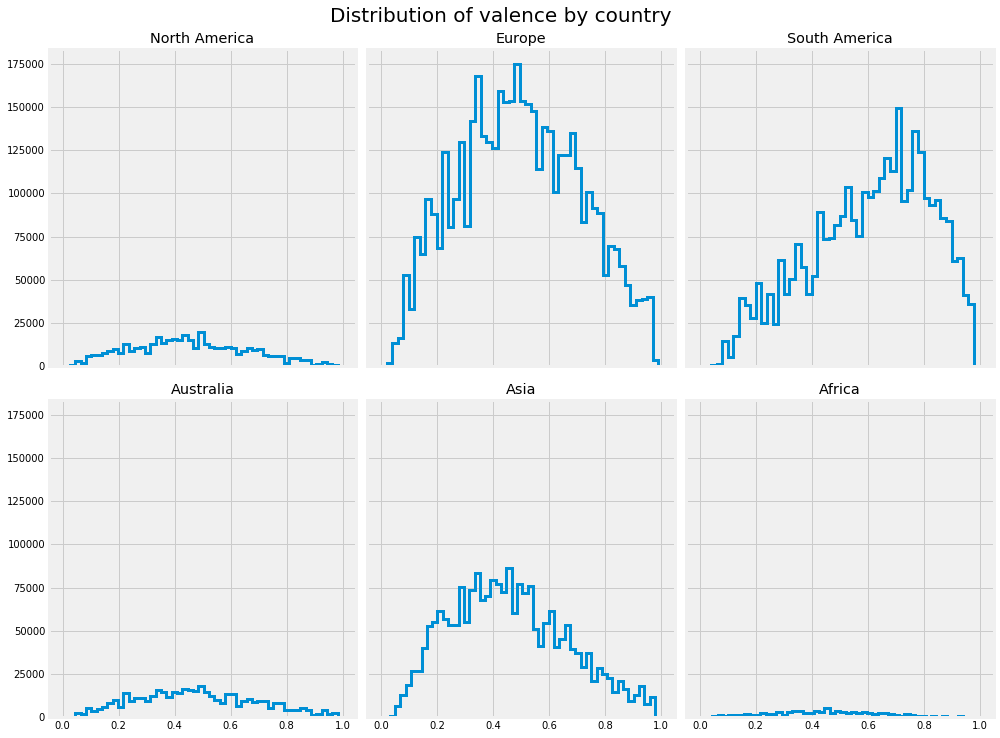

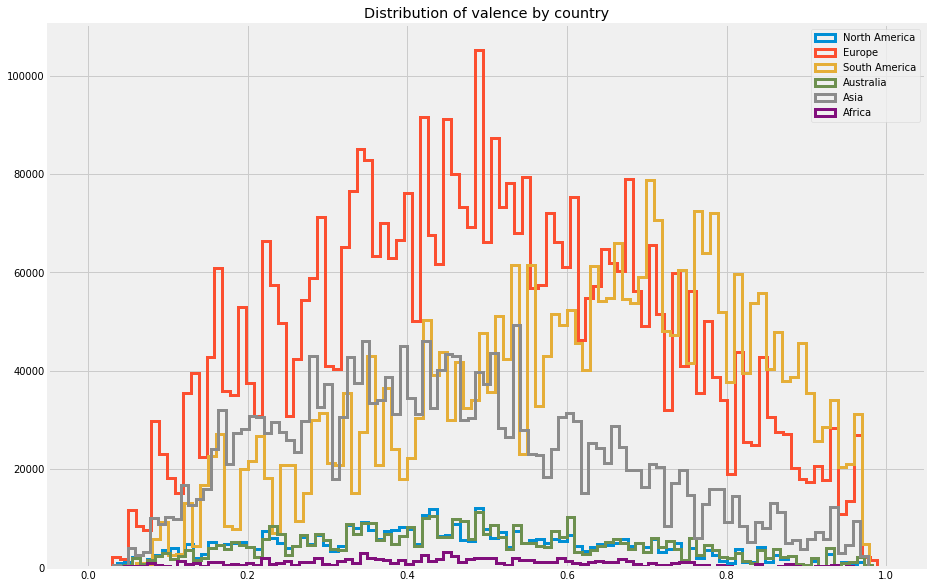

In [74]:
regions = df['region'].unique().tolist()
regions.remove('World')
fig, ax = plt.subplots(2, 3, figsize=(14, 10), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.suptitle('Distribution of valence by country', fontsize=20, y=1.02)
fig.subplots_adjust(top=0.88)
ax = ax.ravel()
for idx, region in enumerate(regions):
    ax[idx].hist(df[df['region'] == region]['valence'], bins=50, histtype='step', linewidth=3)
    ax[idx].set_title(region)
fig.tight_layout()
plt.show()

regions = df['region'].unique().tolist()
regions.remove('World')
plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by country')
for idx, region in enumerate(regions):
    plt.hist(df[df['region'] == region]['valence'], bins=100, histtype='step', linewidth=3, label=region)
plt.legend()
plt.show()

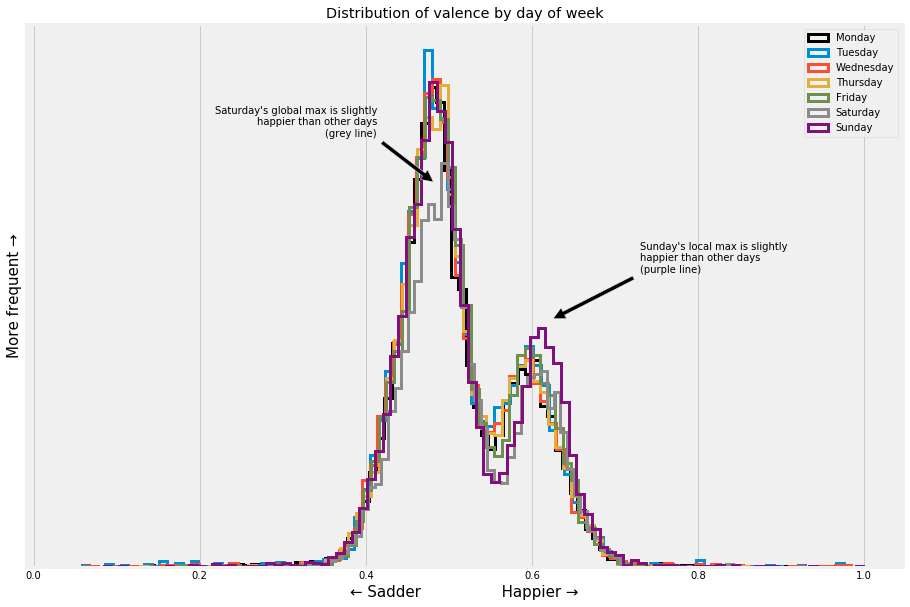

In [75]:
x = df.groupby(['dayofweek', 'country', 'Position'], as_index=False)['valence'].mean()

colors = ['k', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by day of week')
for idx, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
    plt.hist(x[x['dayofweek'] == idx]['valence'], bins=100, histtype='step', linewidth=3, color=colors[idx], label=day)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)

plt.annotate("Saturday's global max is slightly\nhappier than other days\n(grey line)",
             xy=(.485, 700),  xycoords='data',
             xytext=(.4, .85), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='top')
plt.annotate("Sunday's local max is slightly\nhappier than other days\n(purple line)",
             xy=(.62, 450),  xycoords='data',
             xytext=(.7, .6), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.yticks([])
plt.show()

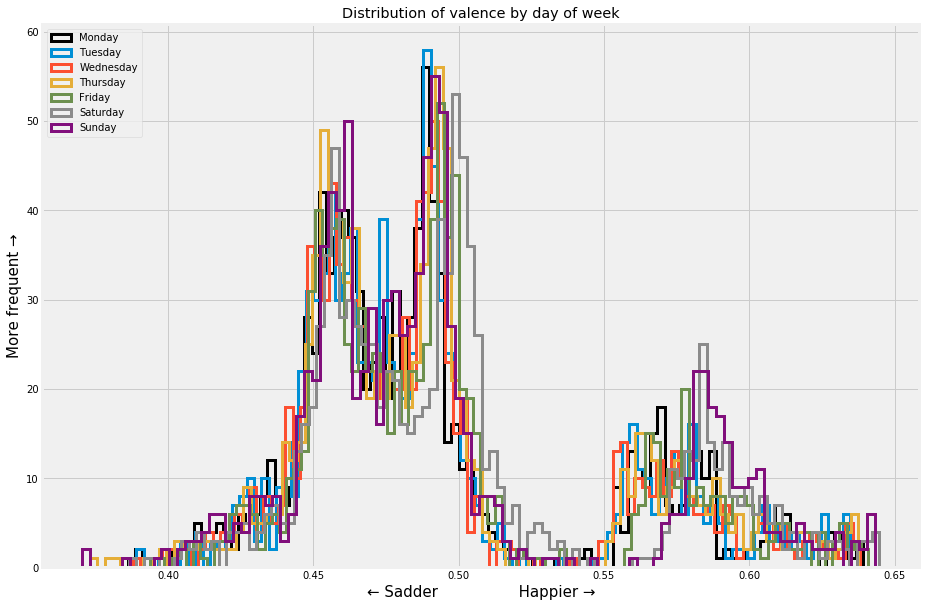

In [76]:
x = df.groupby(['dayofweek', 'Region Name', 'Position'], as_index=False)['valence'].mean()

colors = ['k', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by day of week')
for idx, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
    plt.hist(x[x['dayofweek'] == idx]['valence'], bins=100, histtype='step', linewidth=3, color=colors[idx], label=day)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.show()

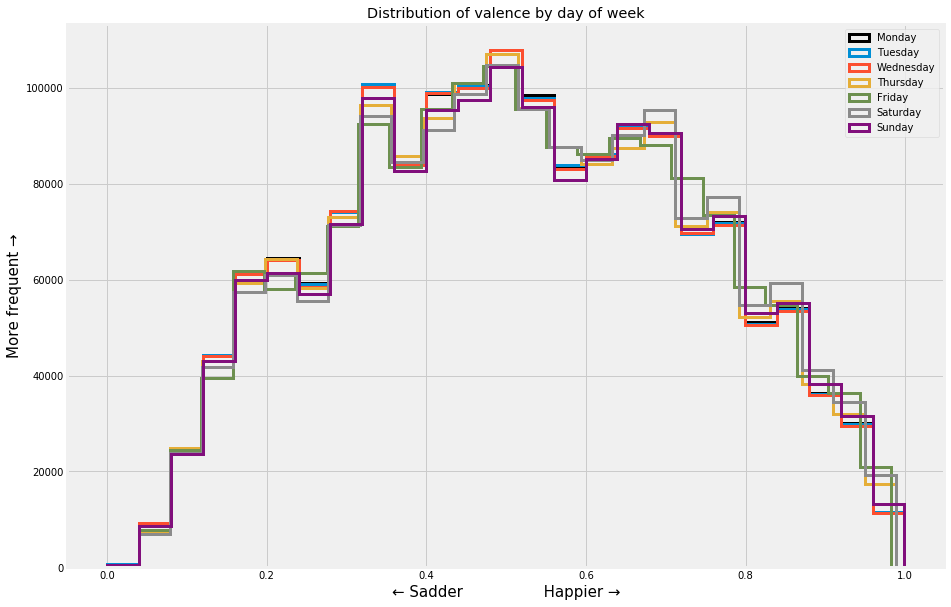

In [77]:
plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by day of week')
for idx, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
    plt.hist(df[df['dayofweek'] == idx]['valence'], bins=25, histtype='step', linewidth=3, color=colors[idx], label=day)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.show()

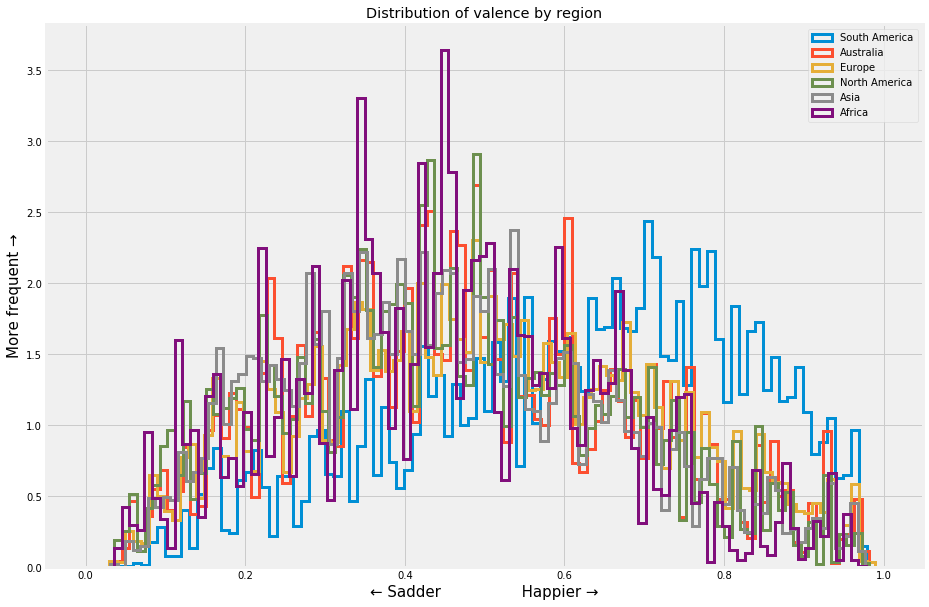

In [78]:
x = df.groupby(['date', 'Position', 'country', 'region'], as_index=False)['valence'].mean()

plt.figure(figsize=(14, 10))
plt.title('Distribution of valence by region')
for region in x['region'].unique():
    if region != 'World':
        plt.hist(x[x['region'] == region]['valence'], bins=100, histtype='step', density=True, linewidth=3, label=region)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.show()

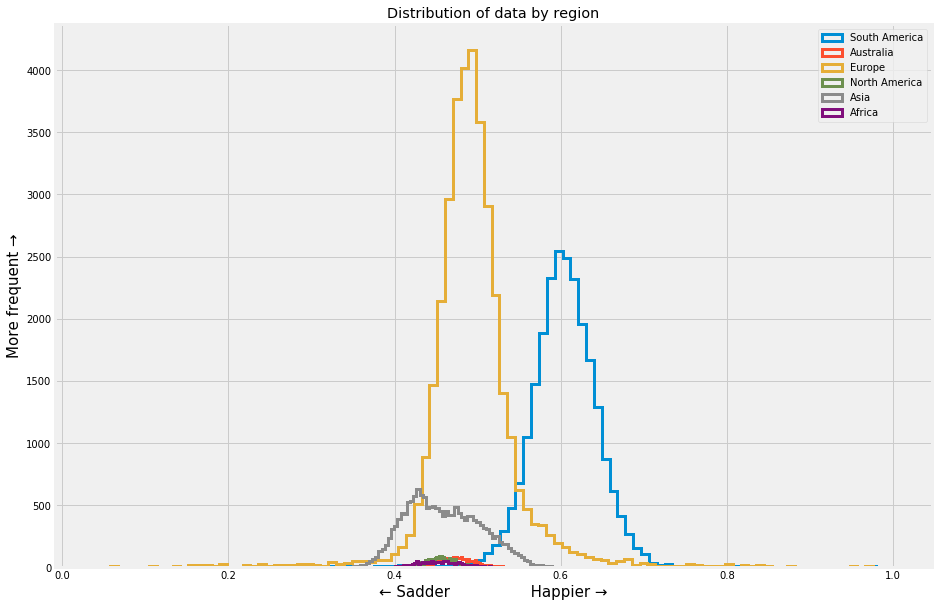

In [79]:
x = df.groupby(['dayofweek', 'country', 'Position', 'region'], as_index=False)['valence'].mean()

plt.figure(figsize=(14, 10))
plt.title('Distribution of data by region')
for region in x['region'].unique():
    if region != 'World':
        plt.hist(x[x['region'] == region]['valence'], bins=100, histtype='step', linewidth=3, label=region)
plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.show()